In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [90]:
dataset = pd.read_csv('../data/train.csv')
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [91]:
dataset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [93]:
# coluna com dados faltantes
dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

### Análise Exploratória

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']


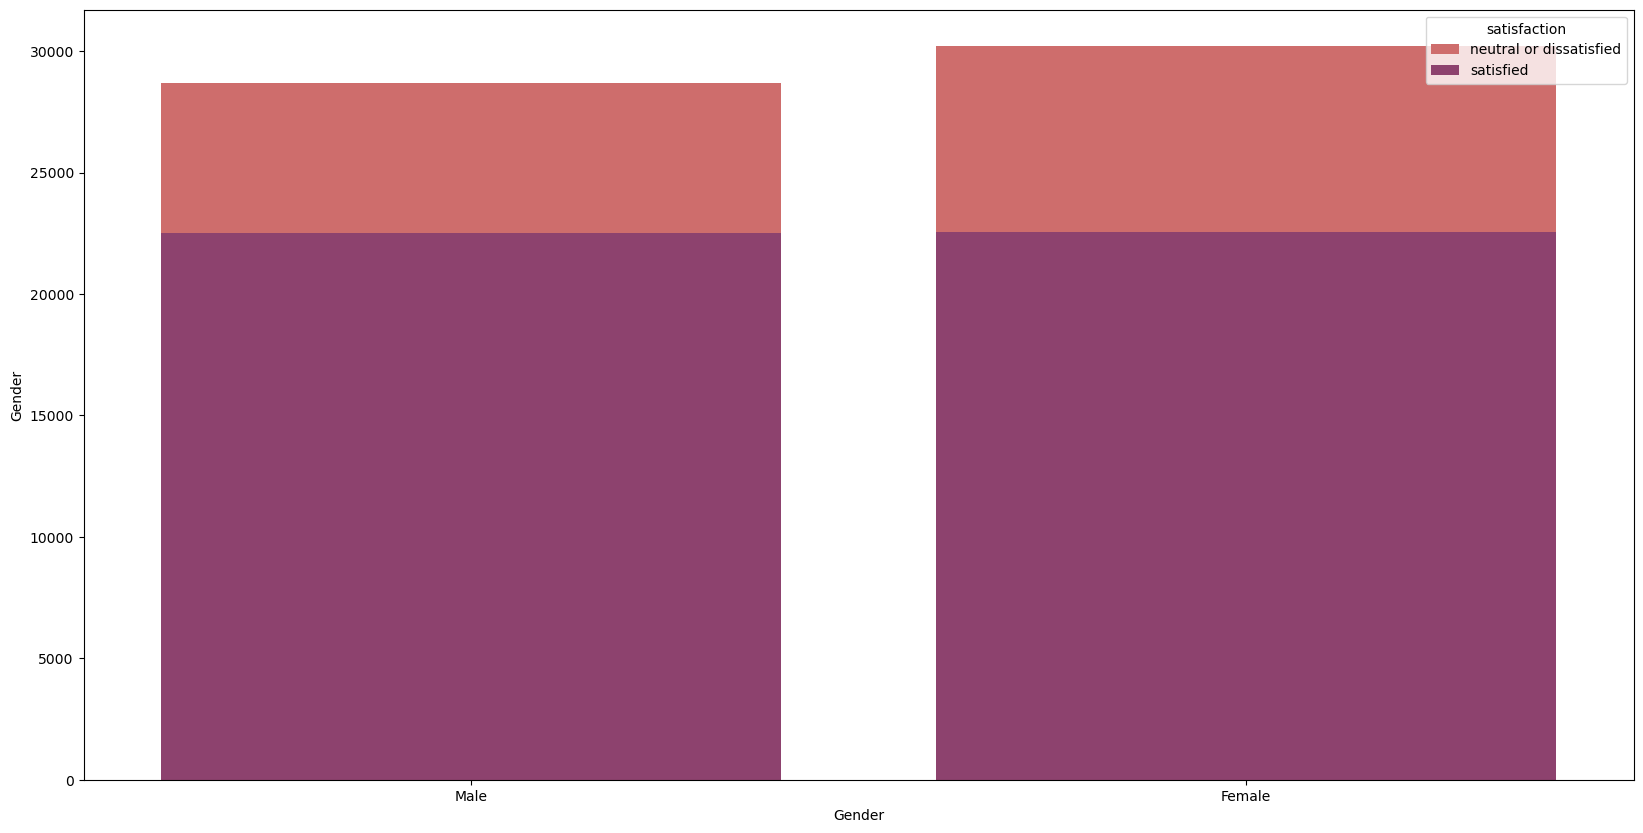

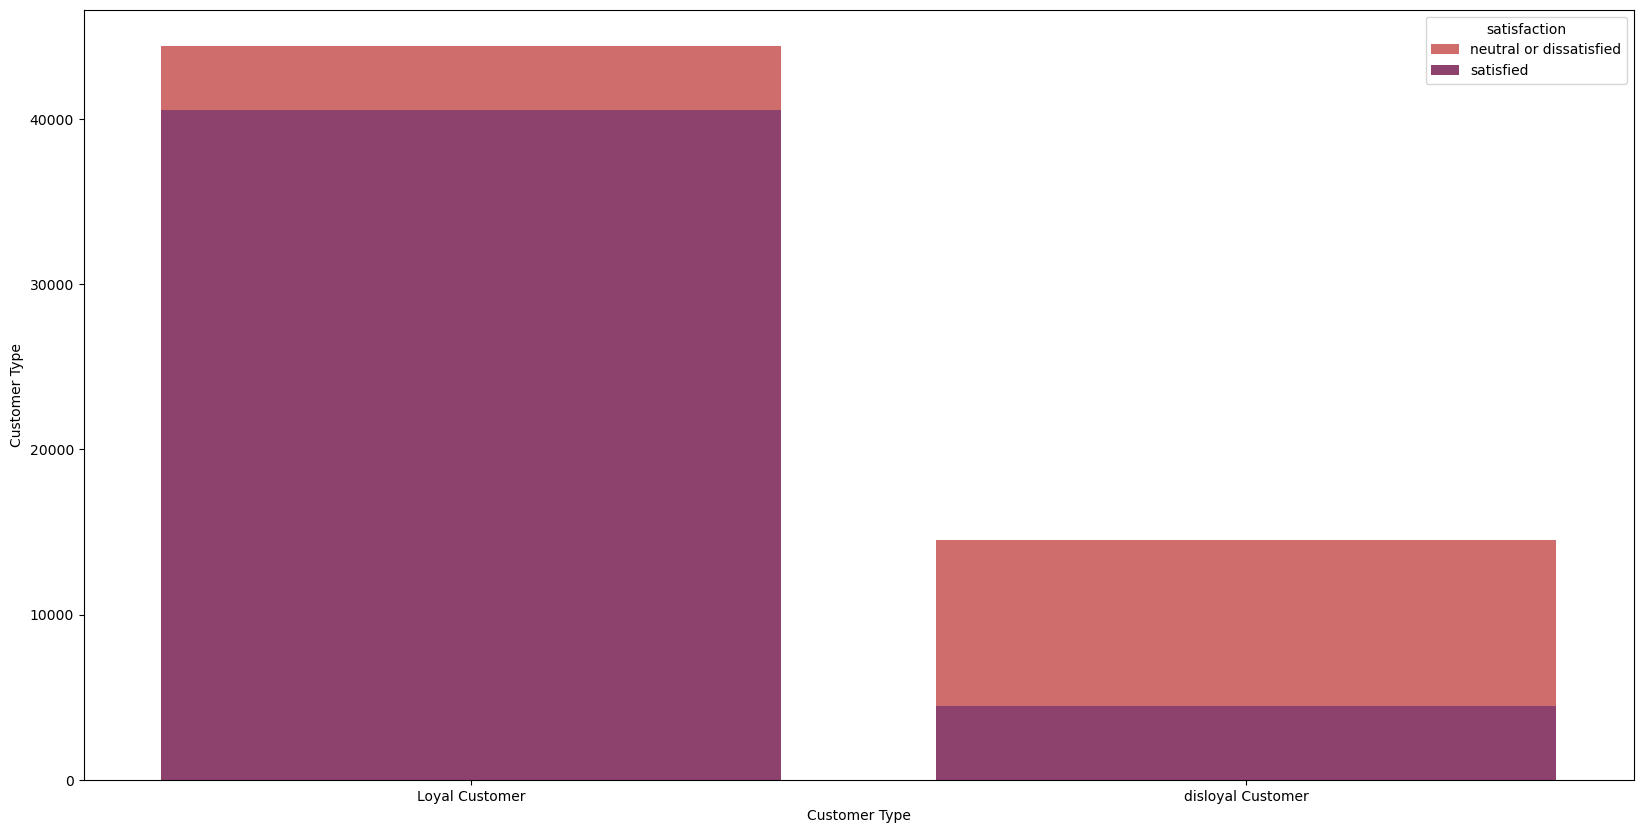

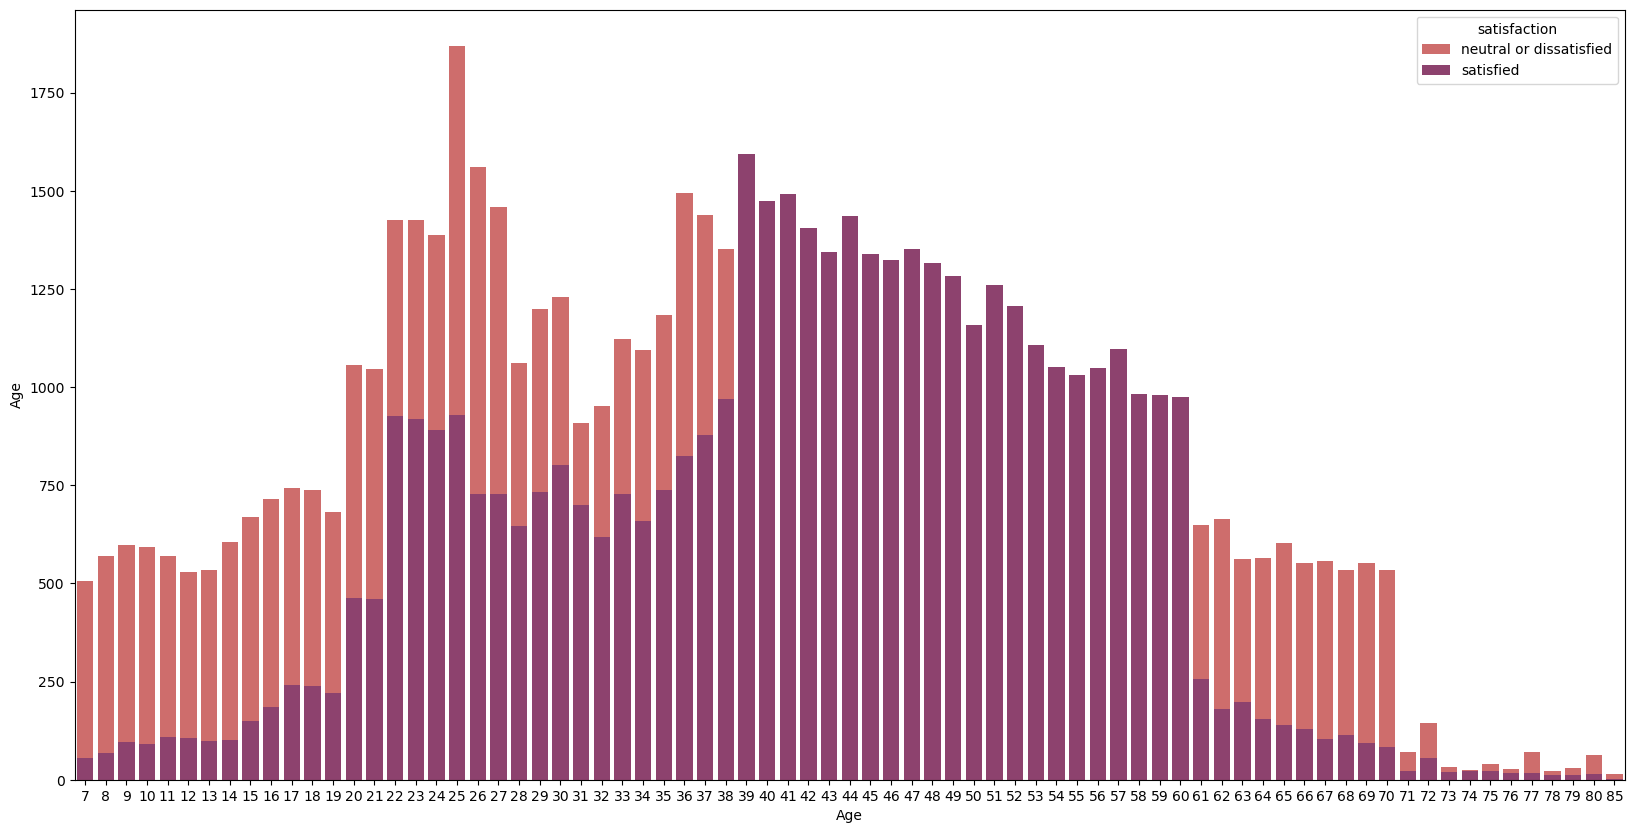

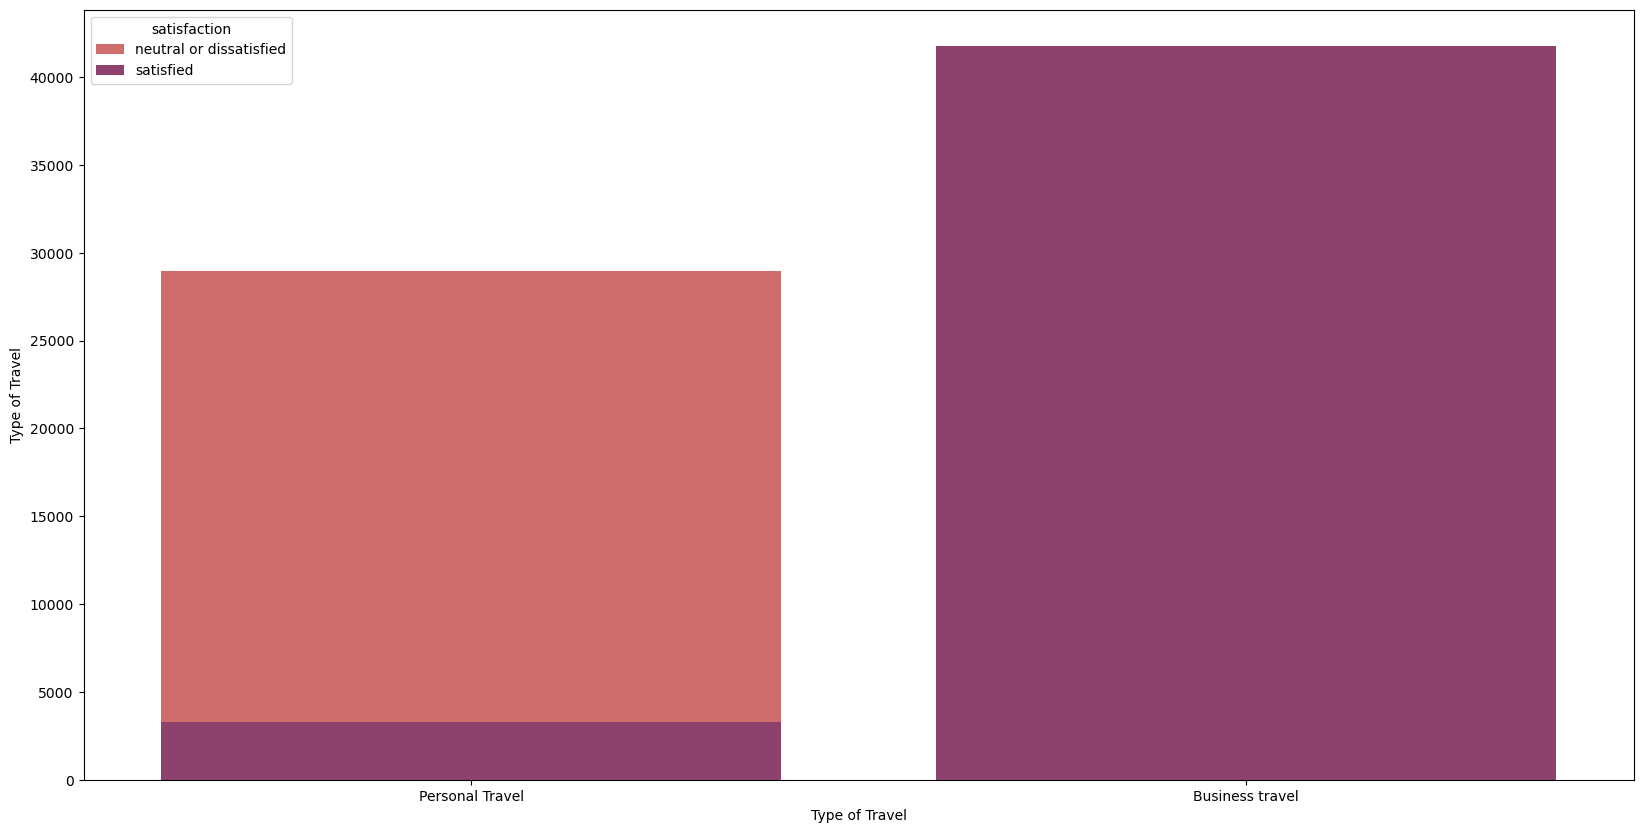

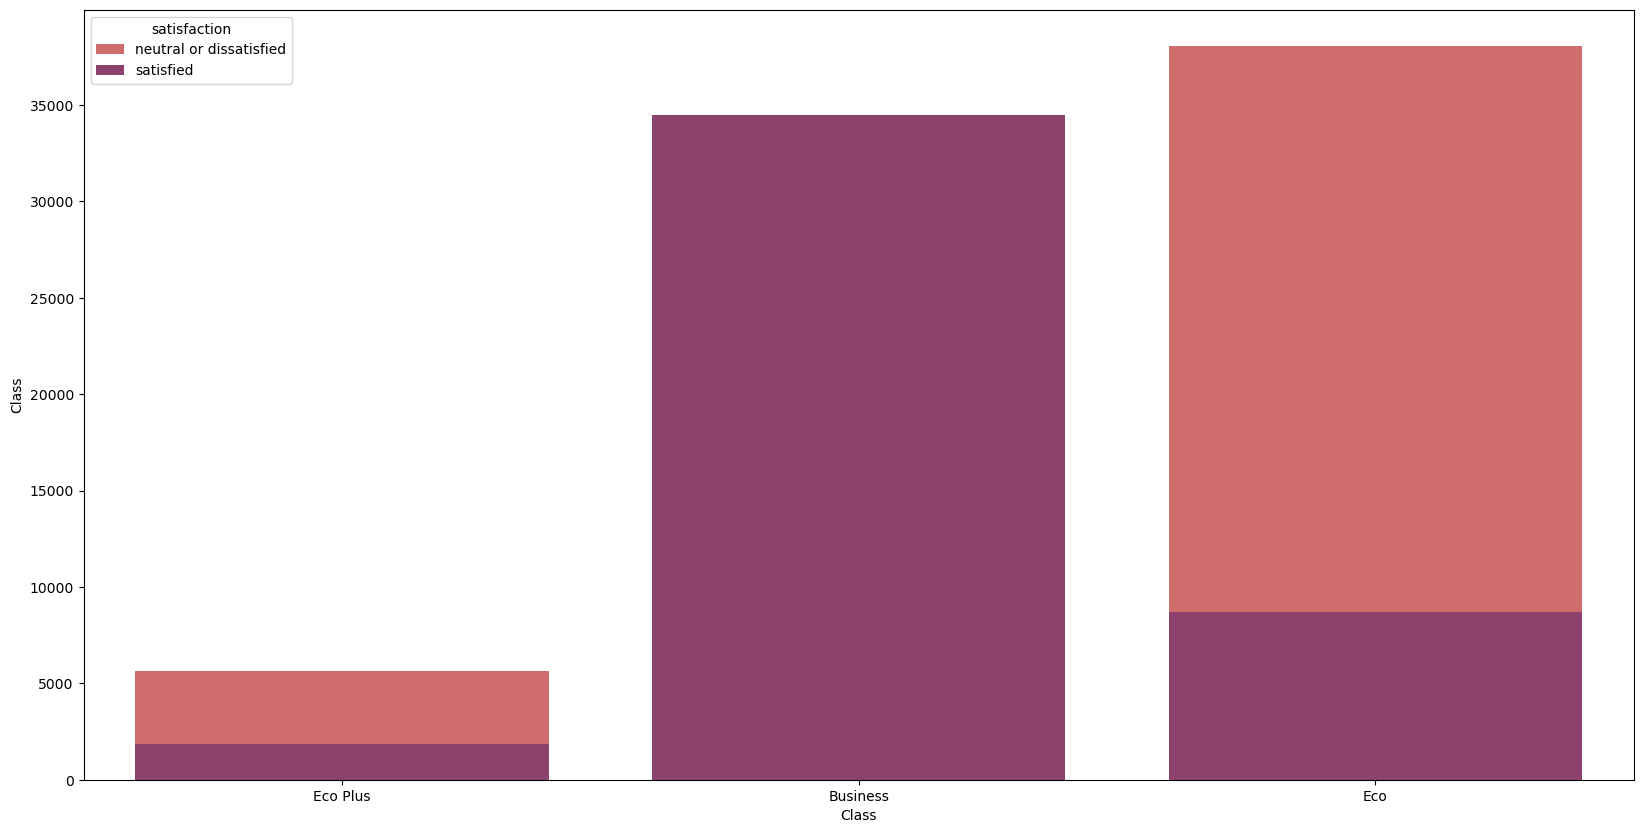

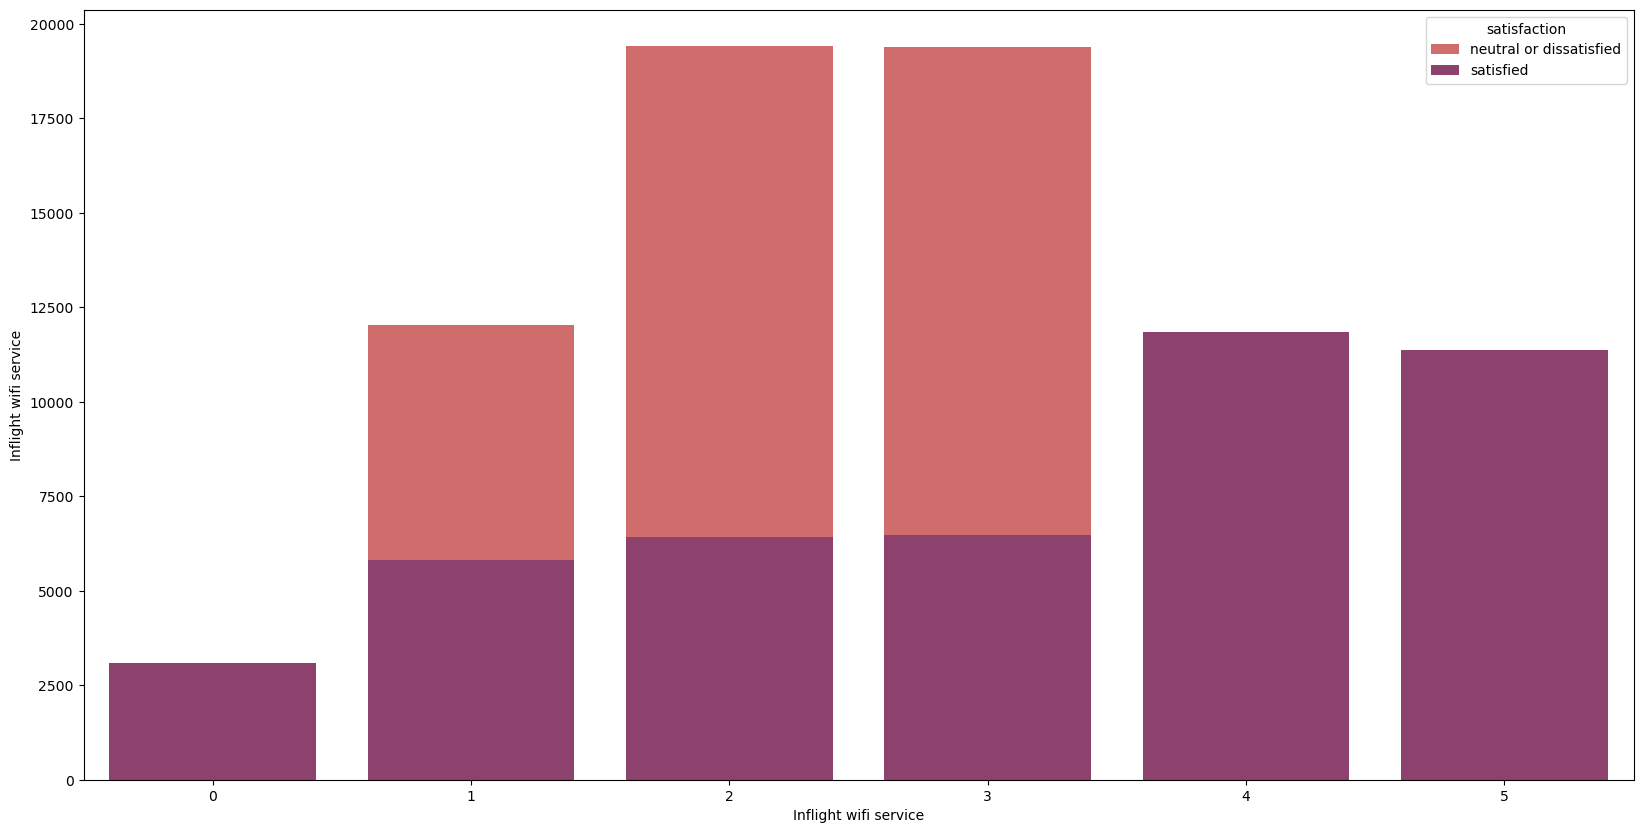

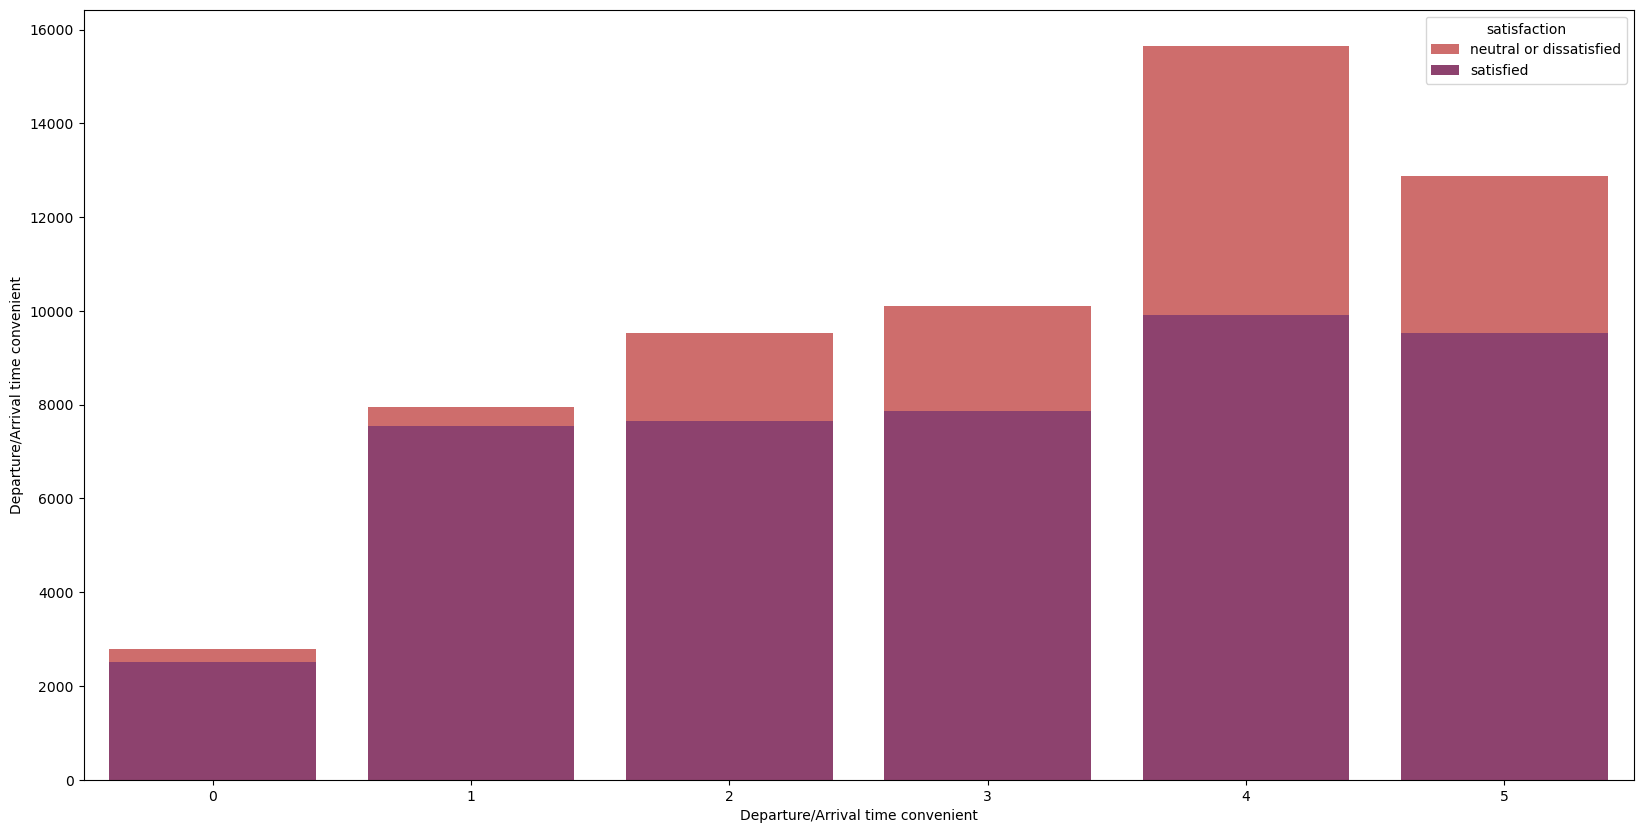

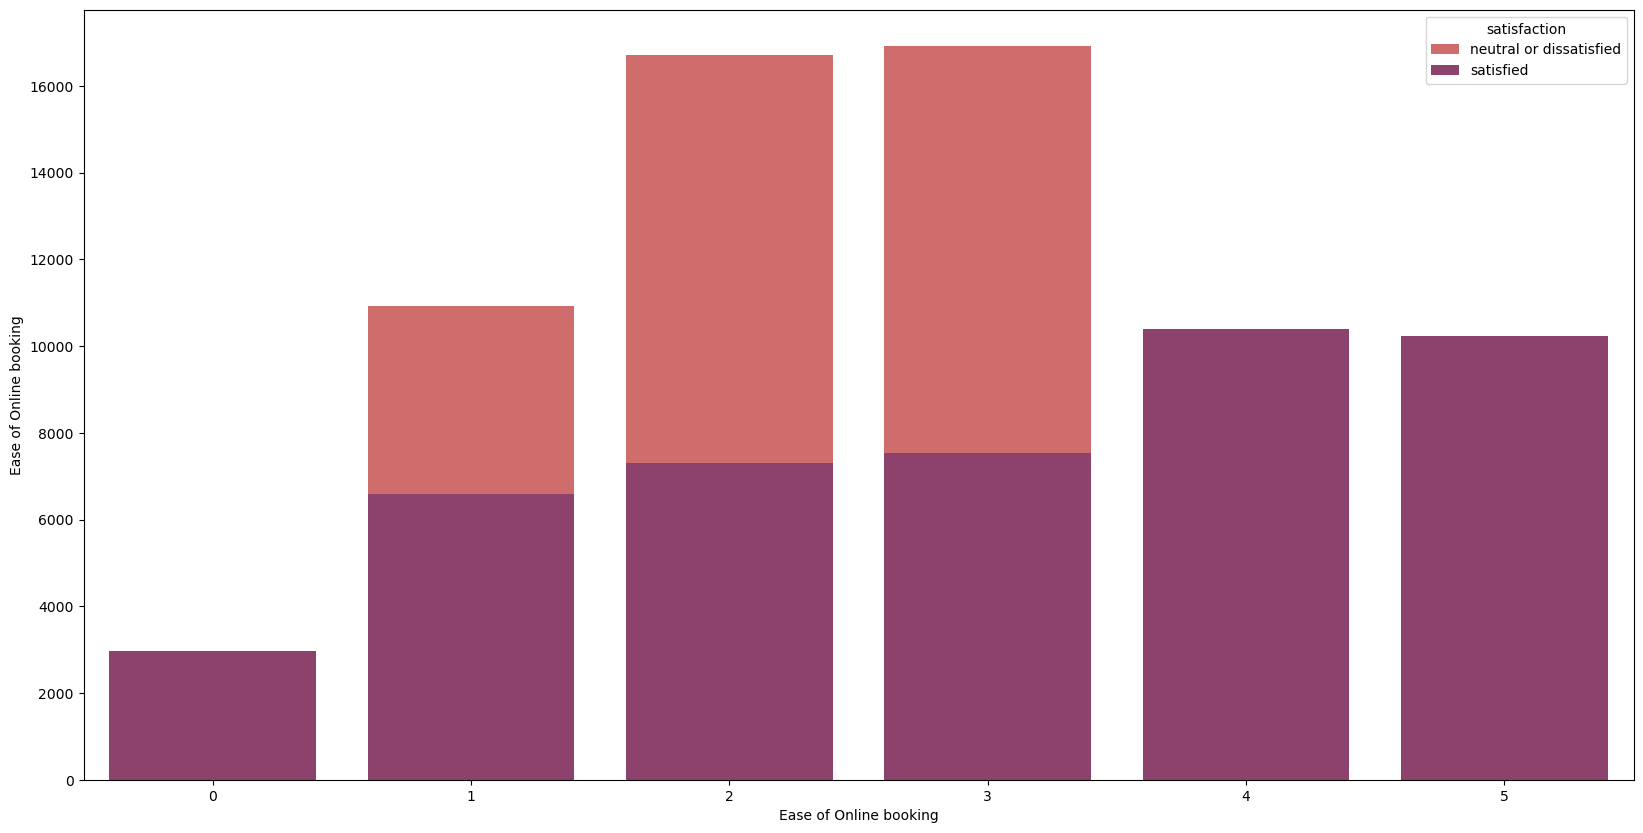

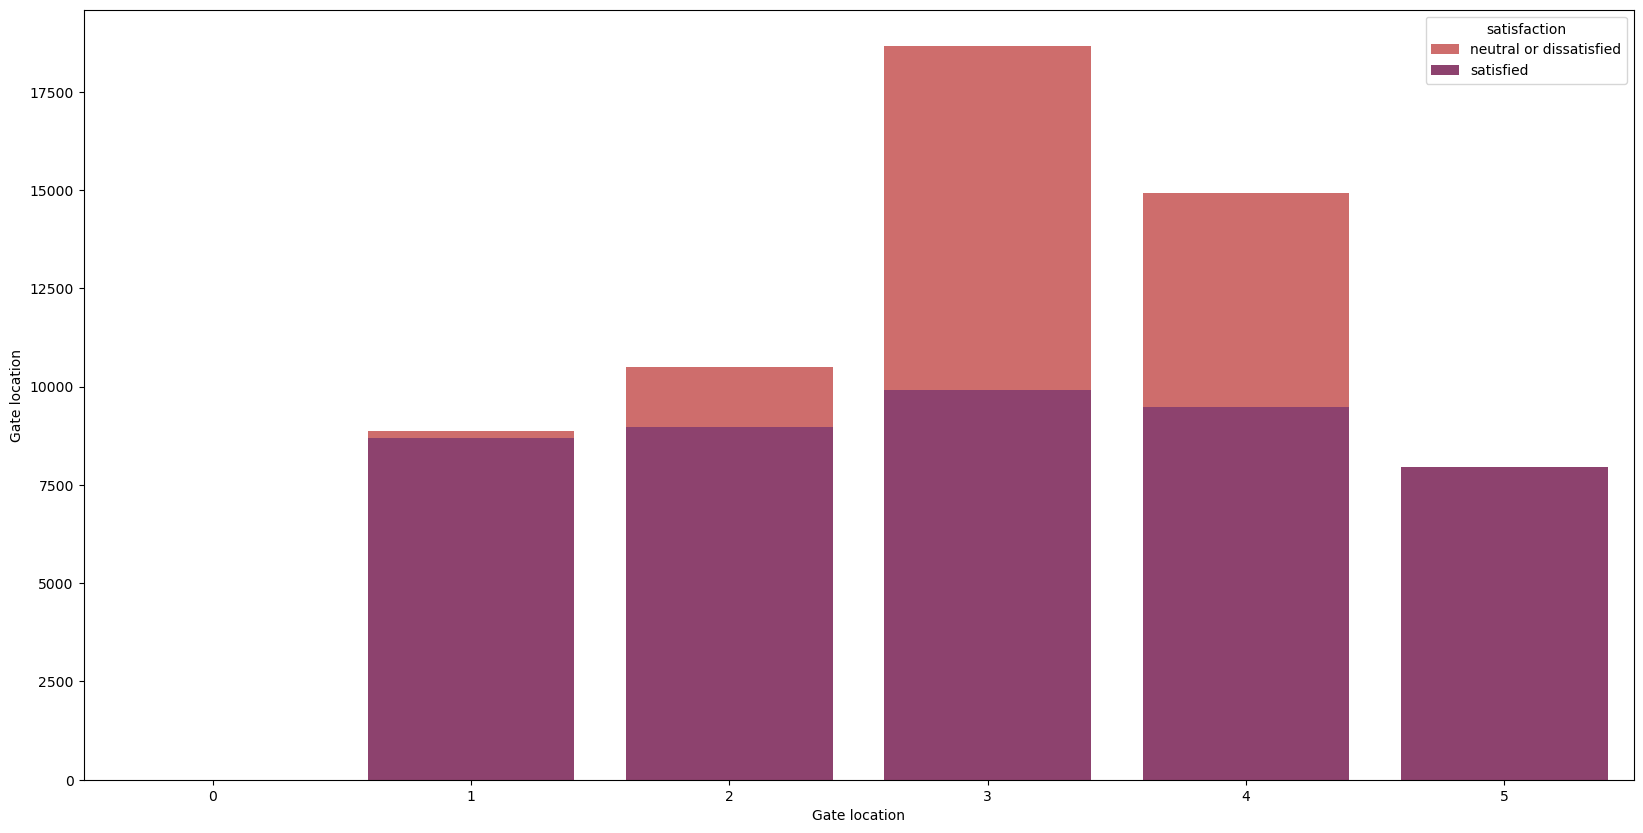

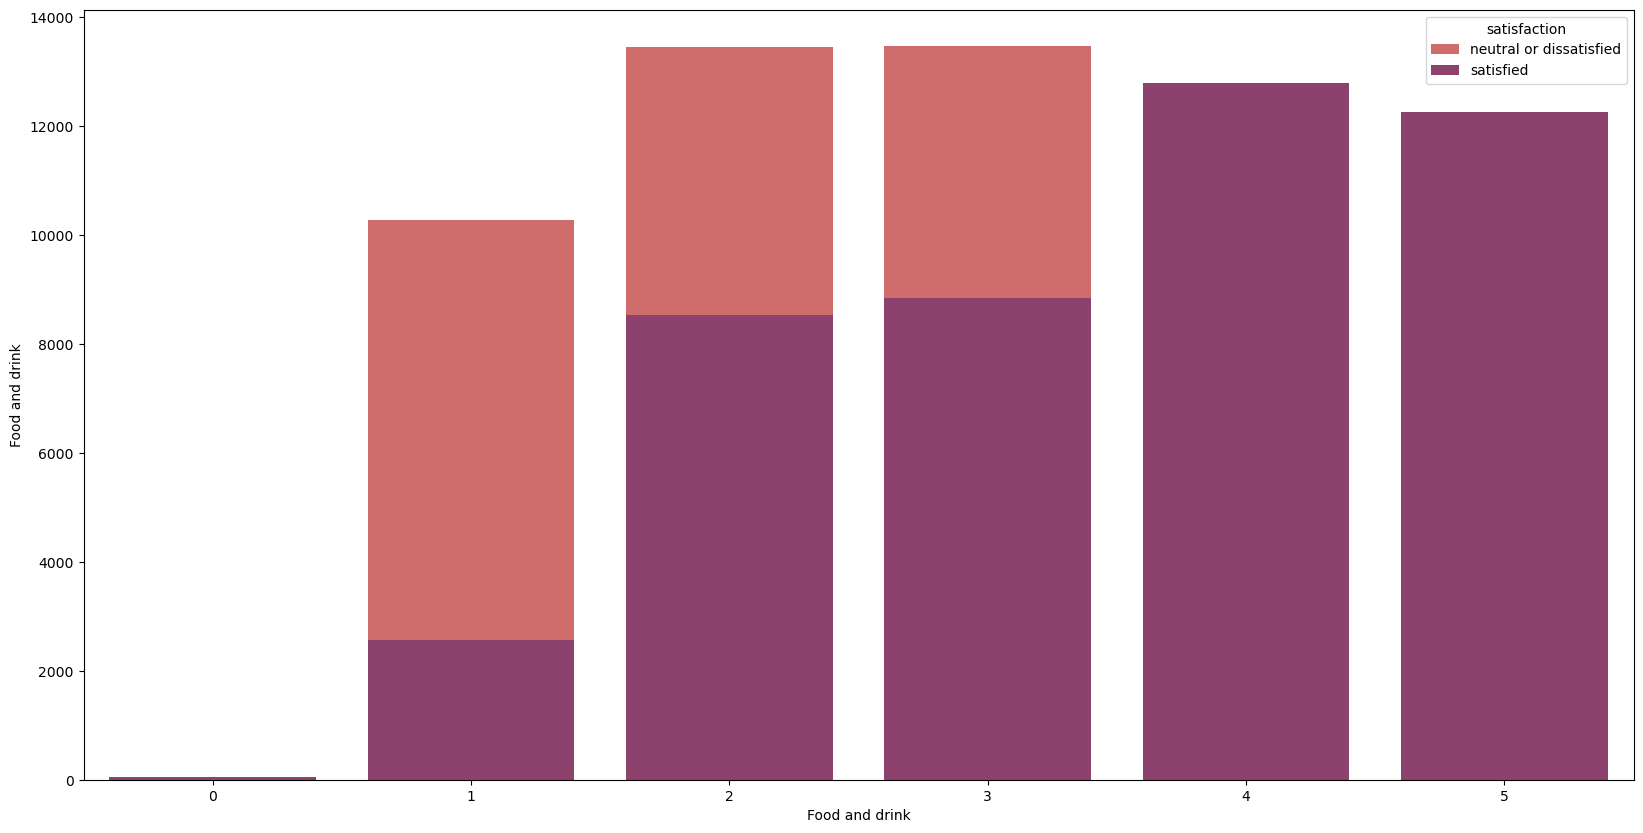

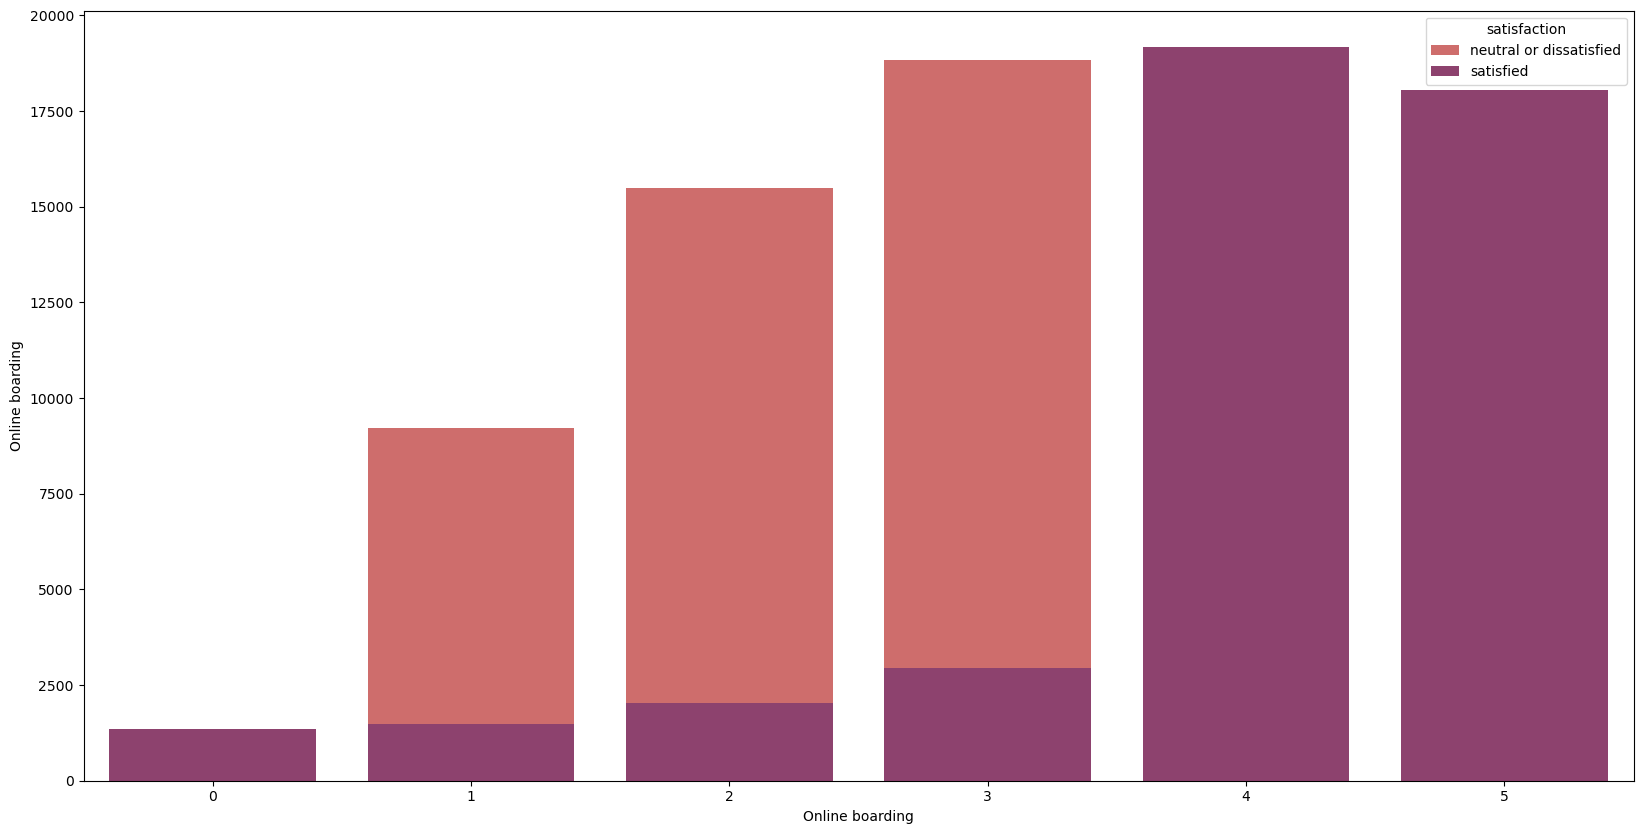

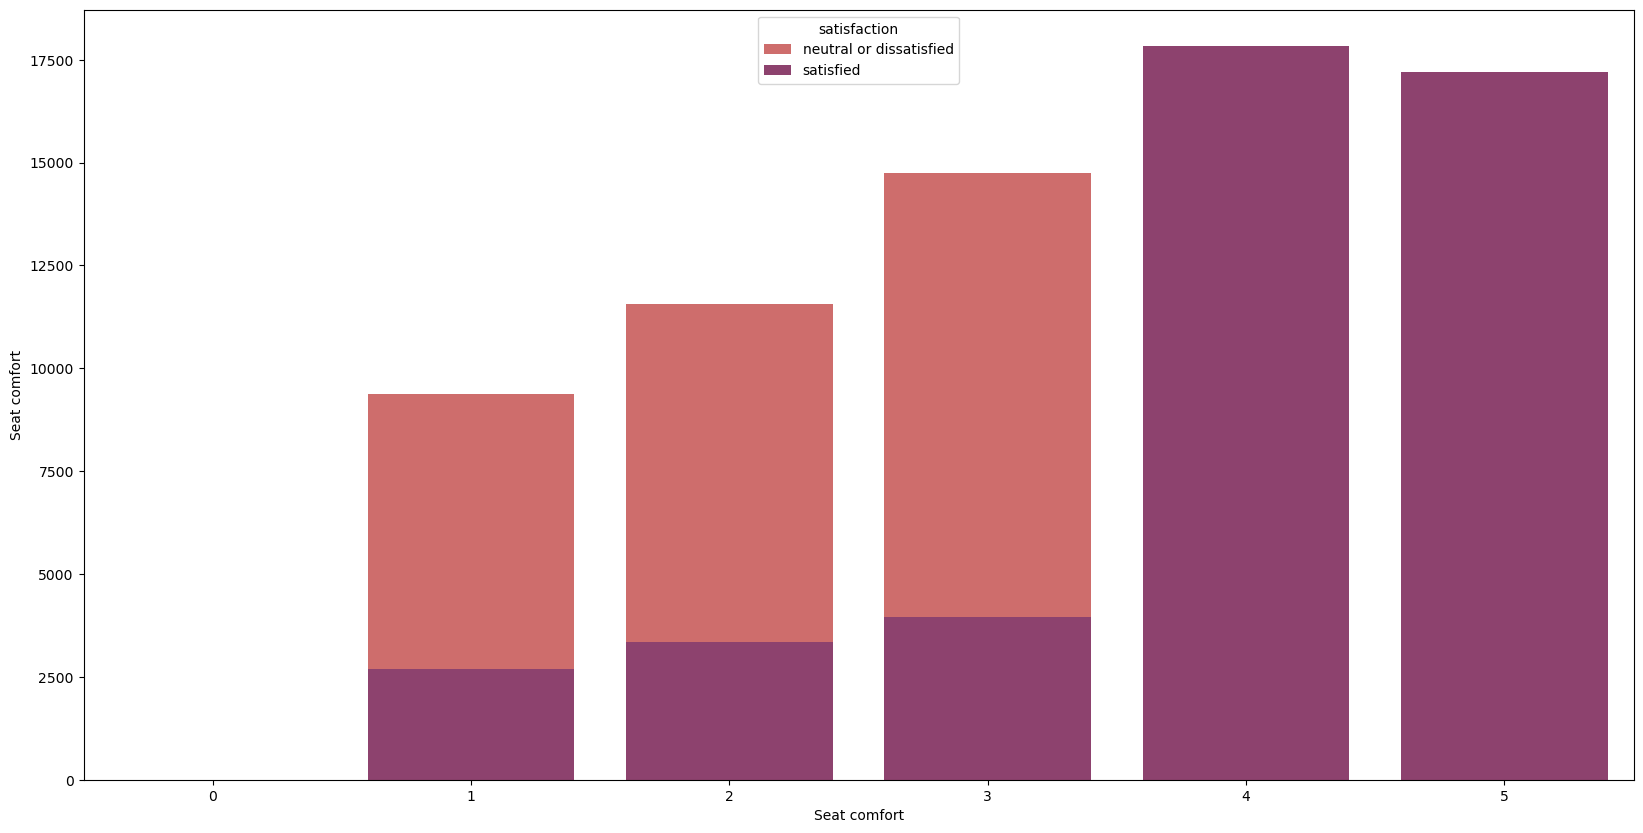

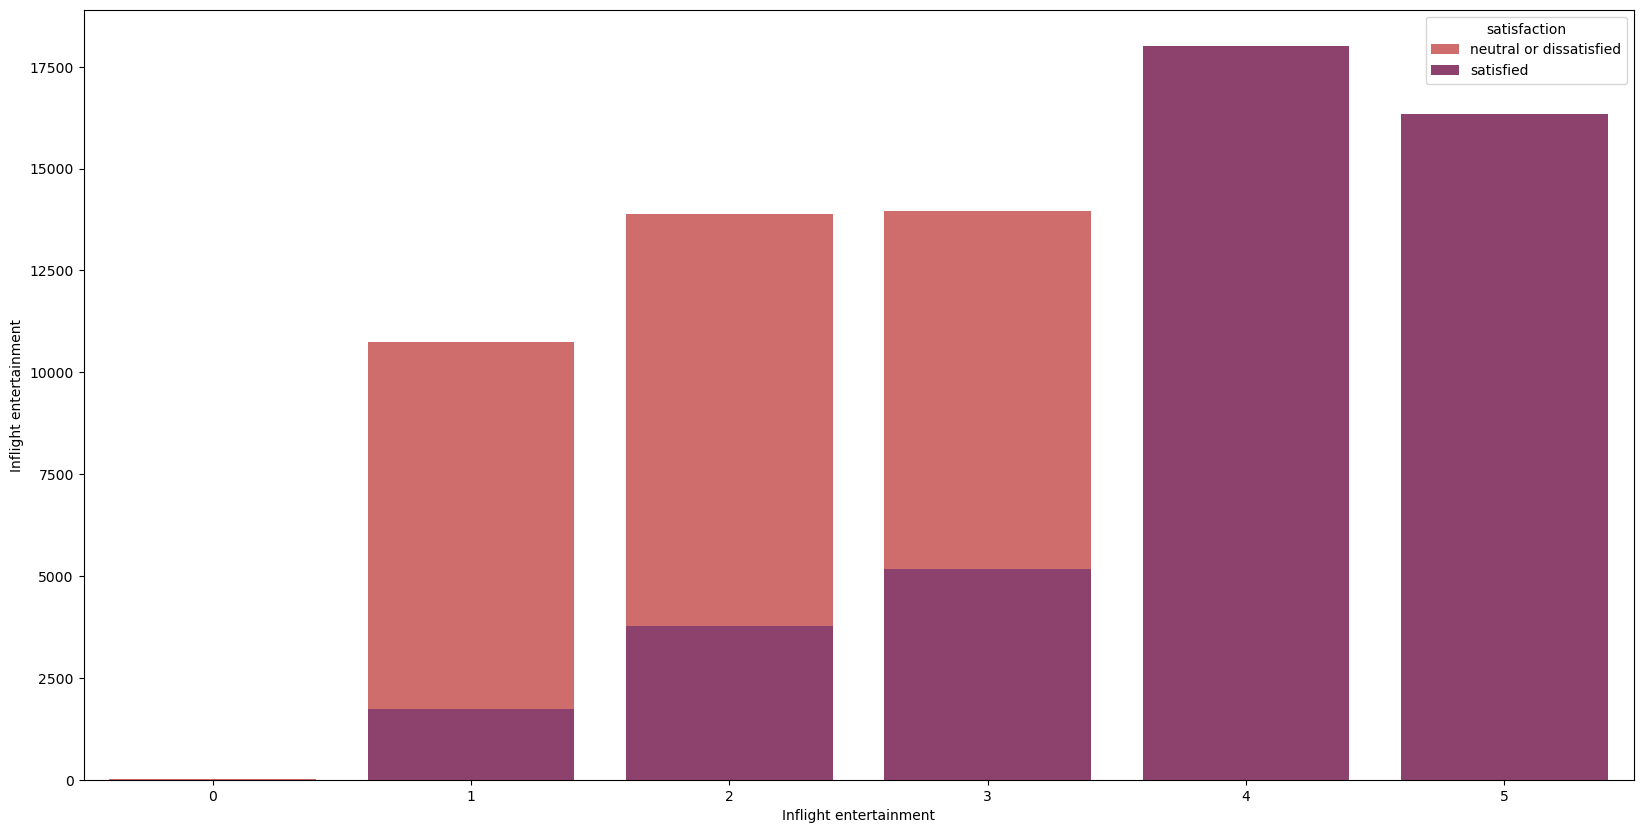

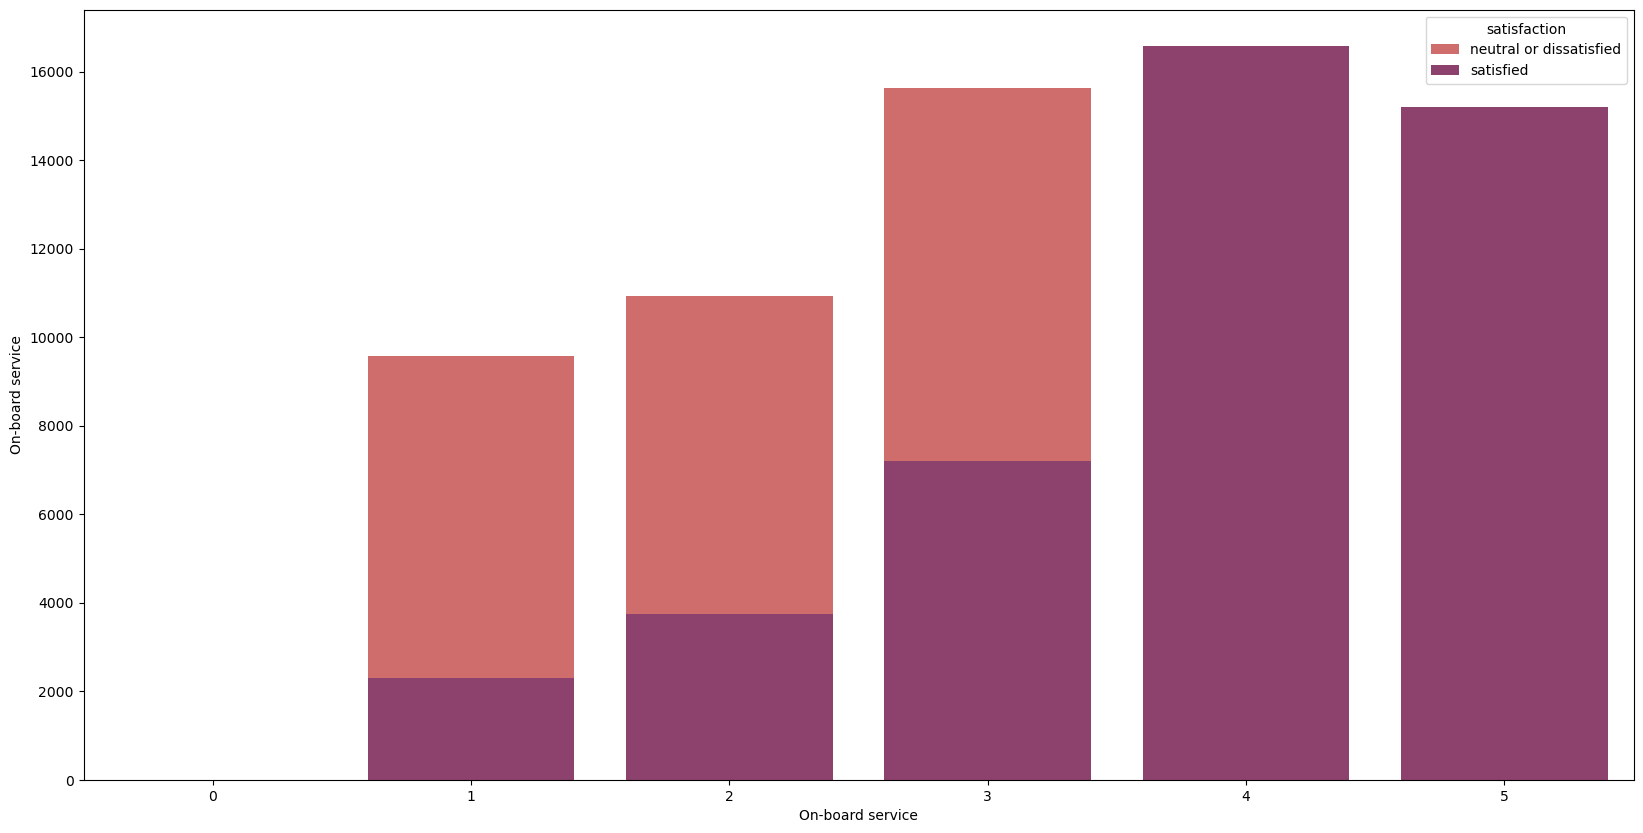

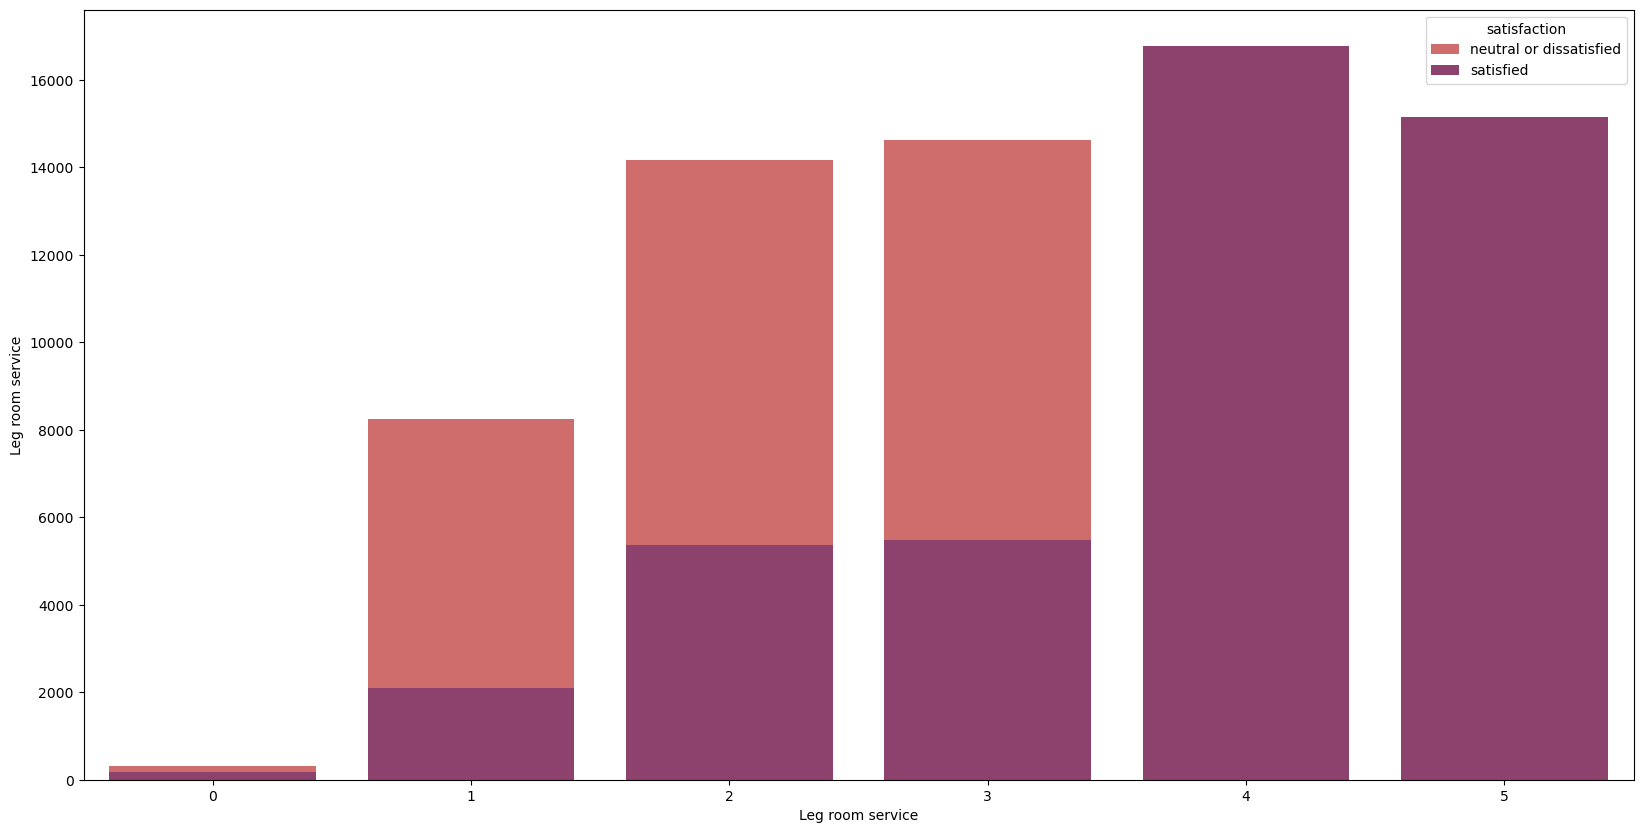

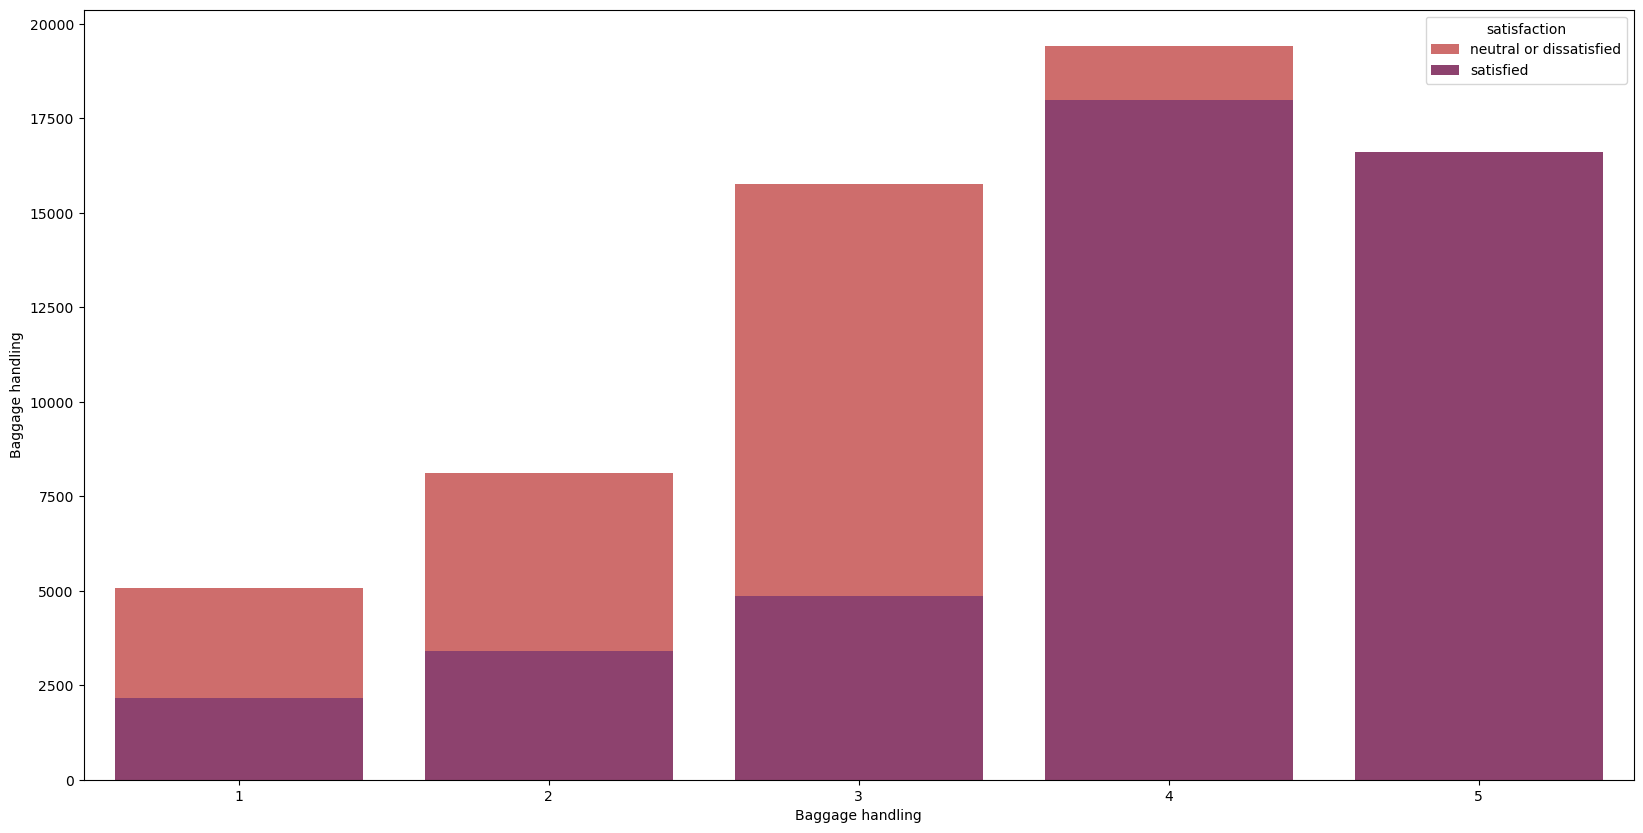

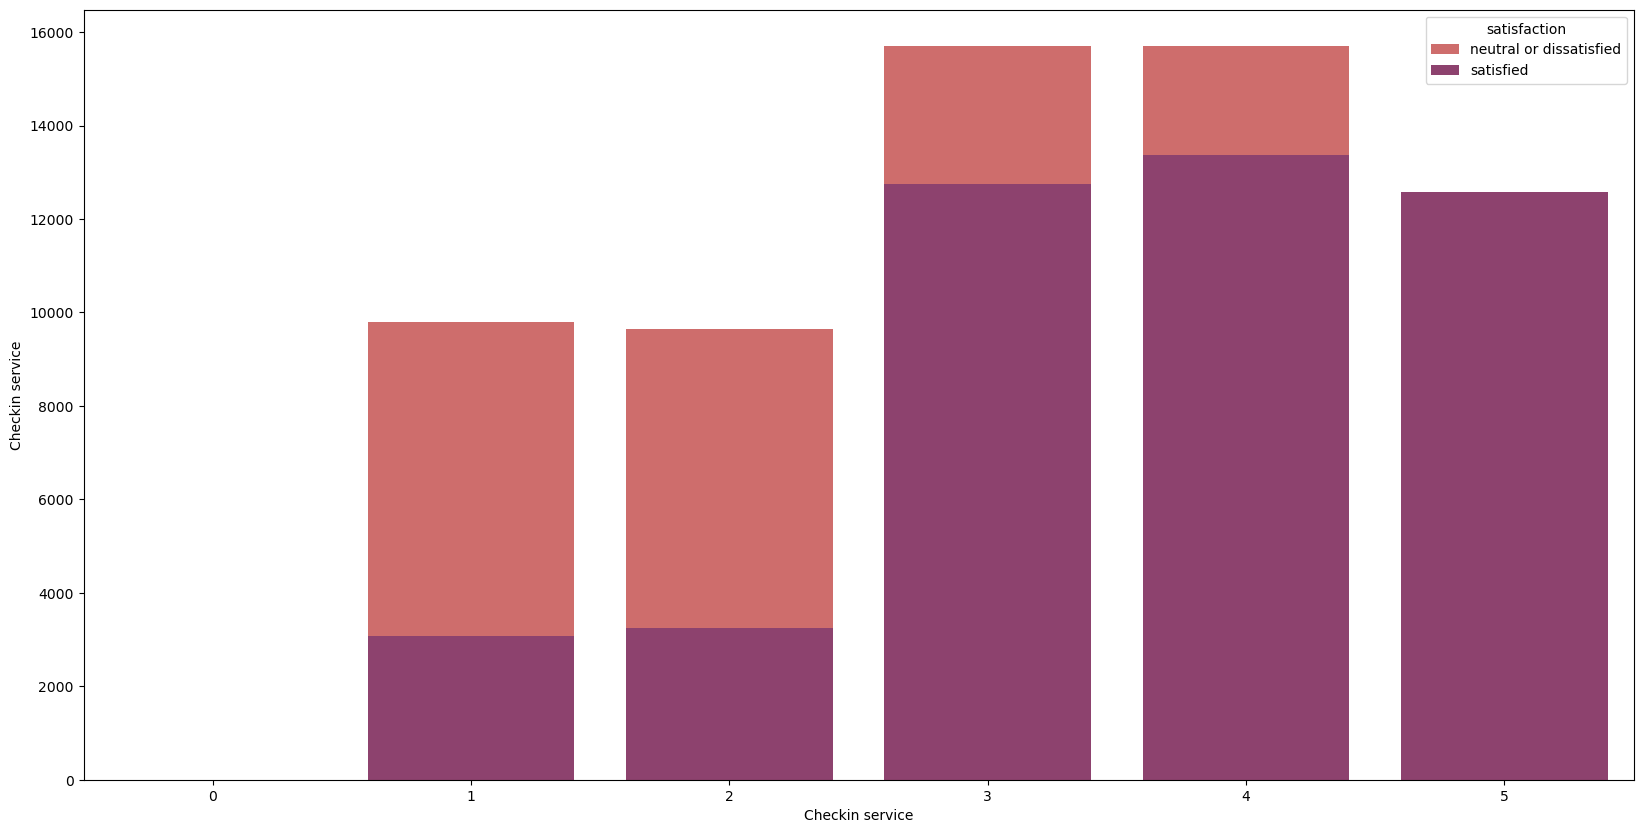

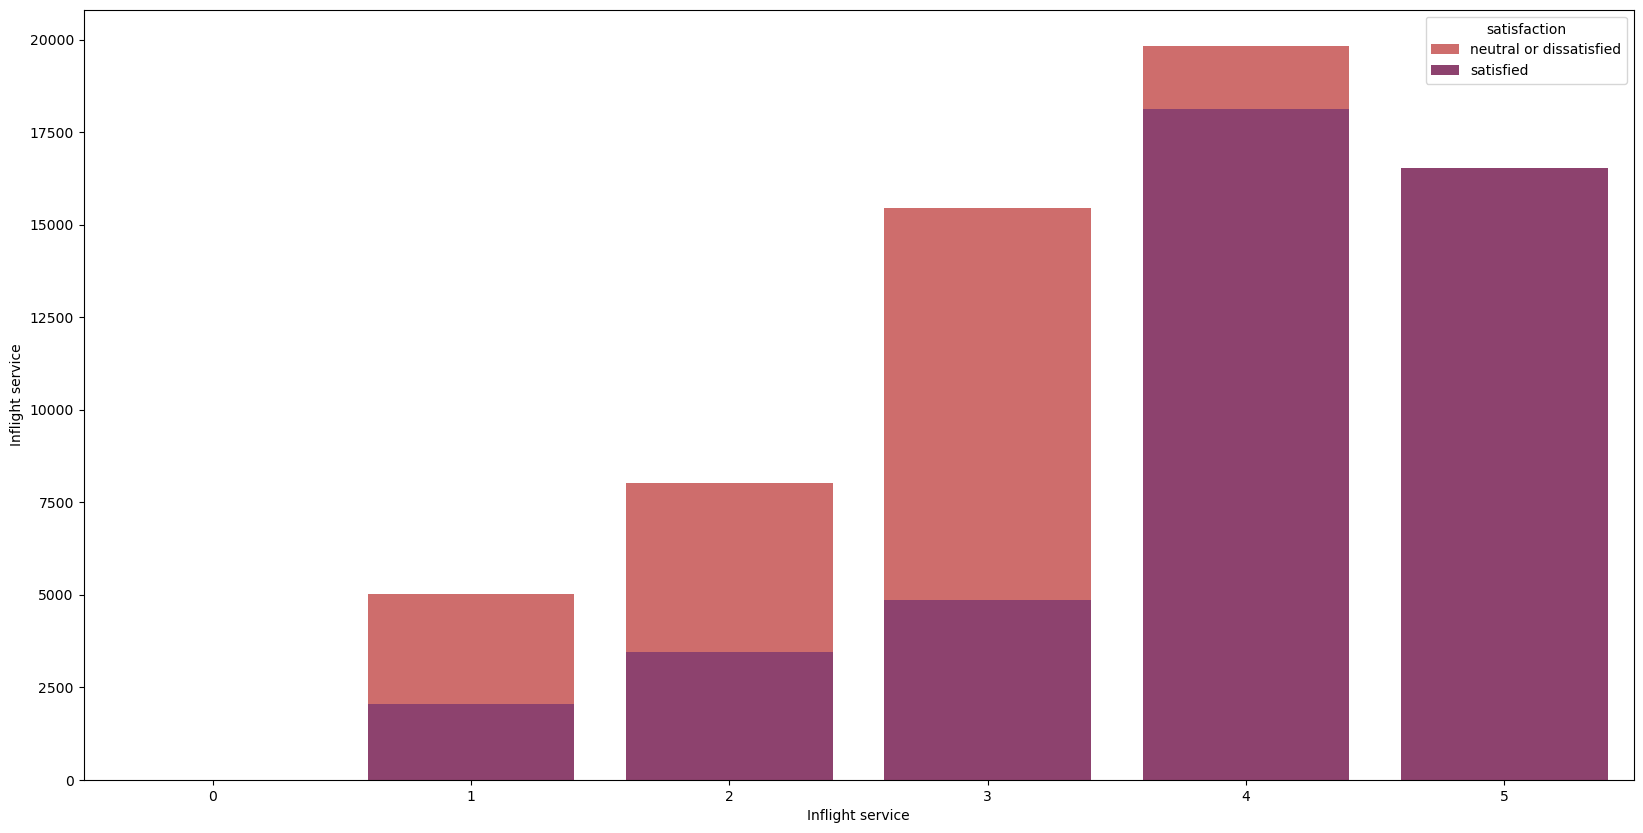

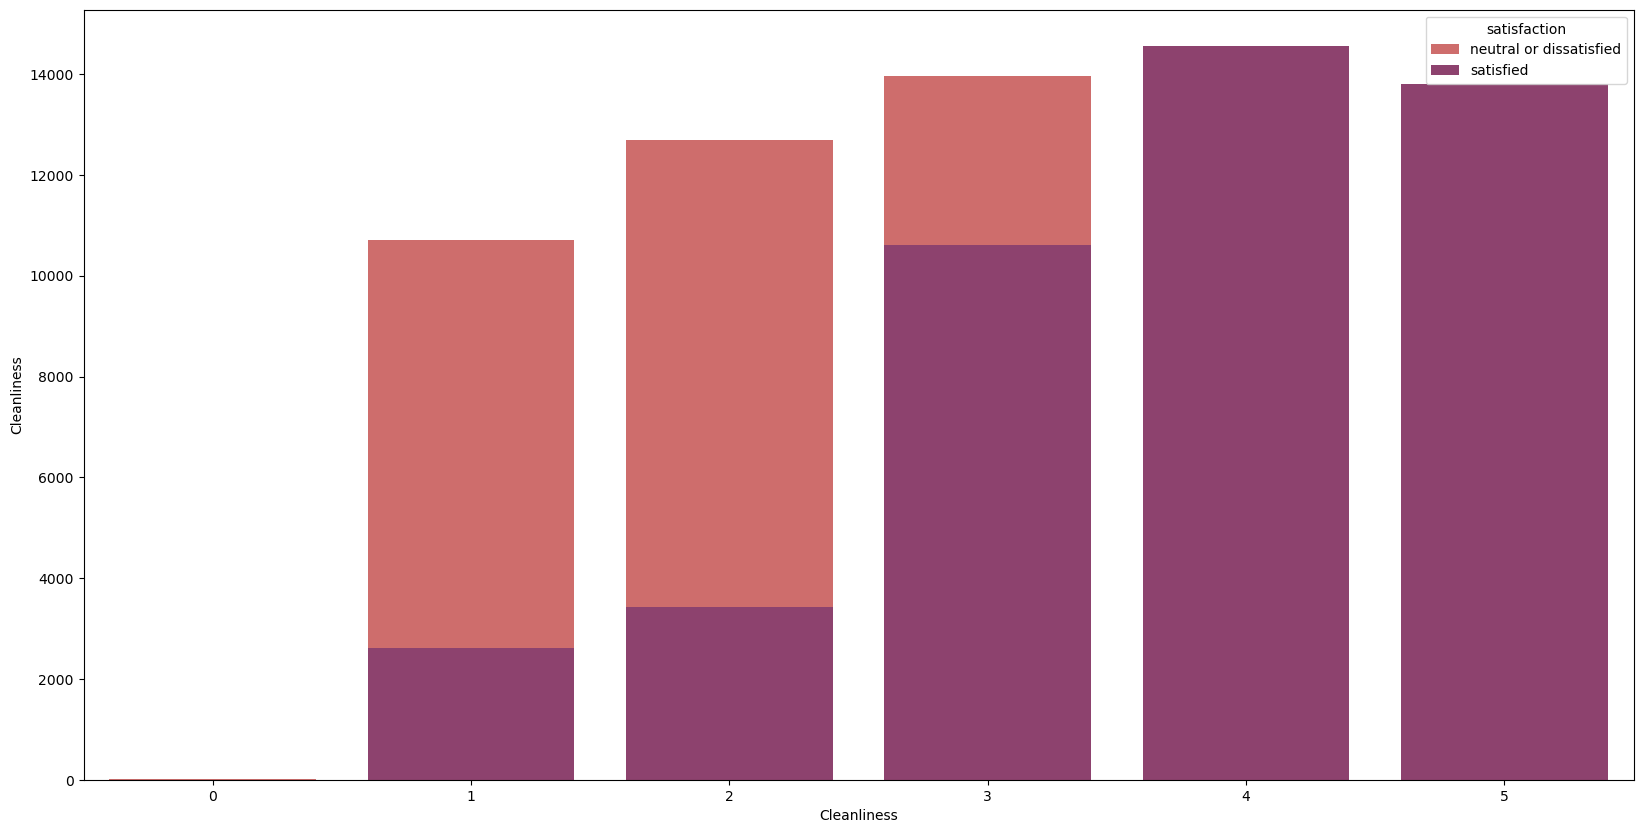

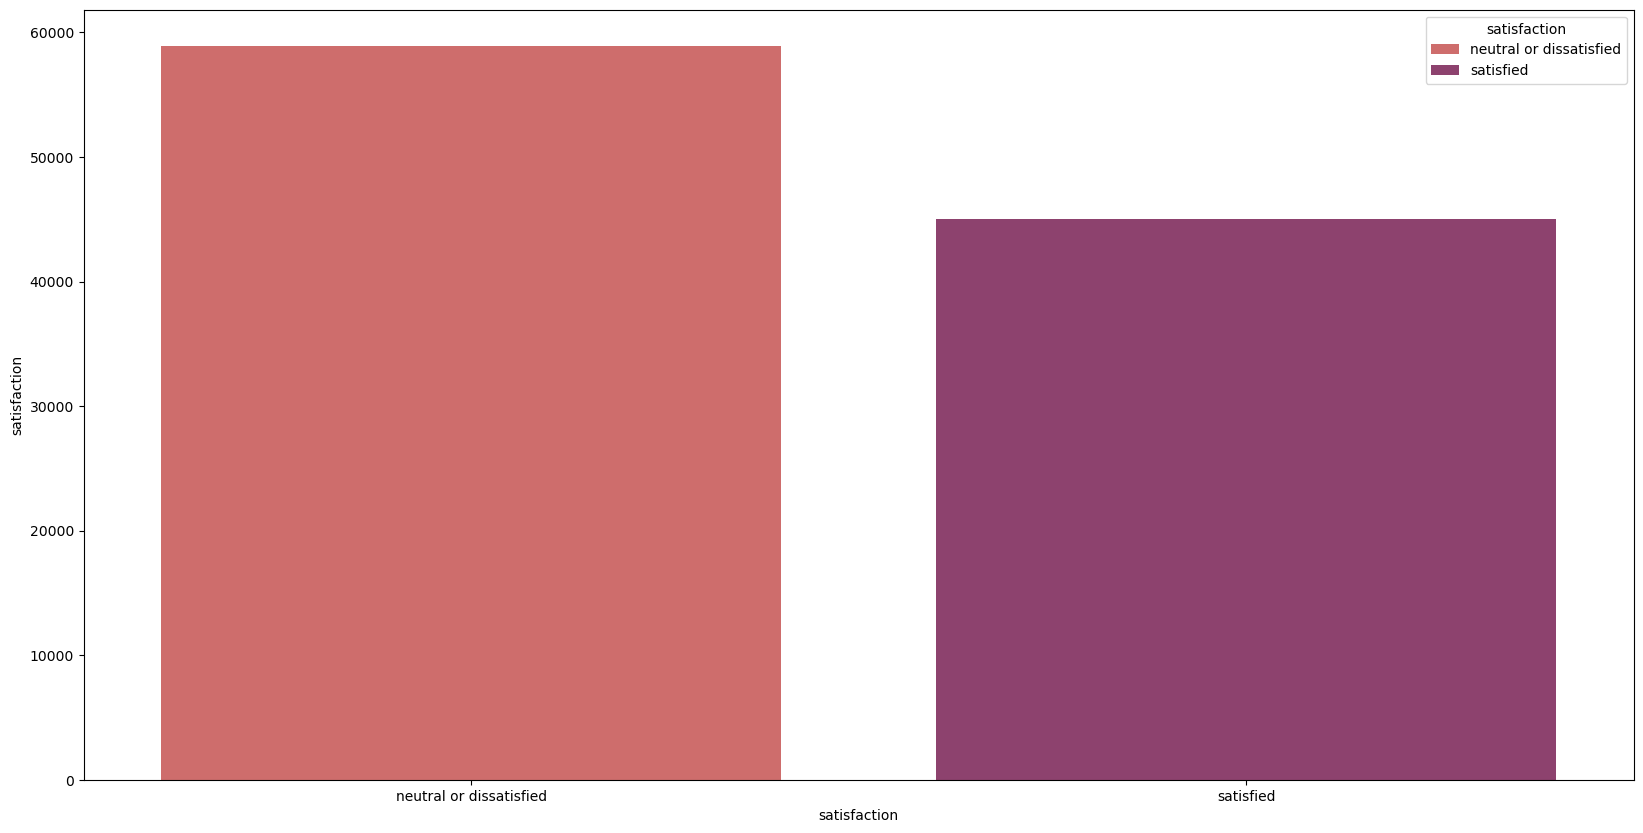

In [94]:
labels = list(dataset.columns[2:])
labels.remove('Flight Distance')
labels.remove('Arrival Delay in Minutes')
labels.remove('Departure Delay in Minutes')
print(labels)

for label in labels:
    plt.figure(figsize=[20,10])
    sns.countplot(x=label, data=dataset, palette="flare", hue=dataset['satisfaction'], dodge=False)
    _ = plt.ylabel(label)
    _ = plt.show()

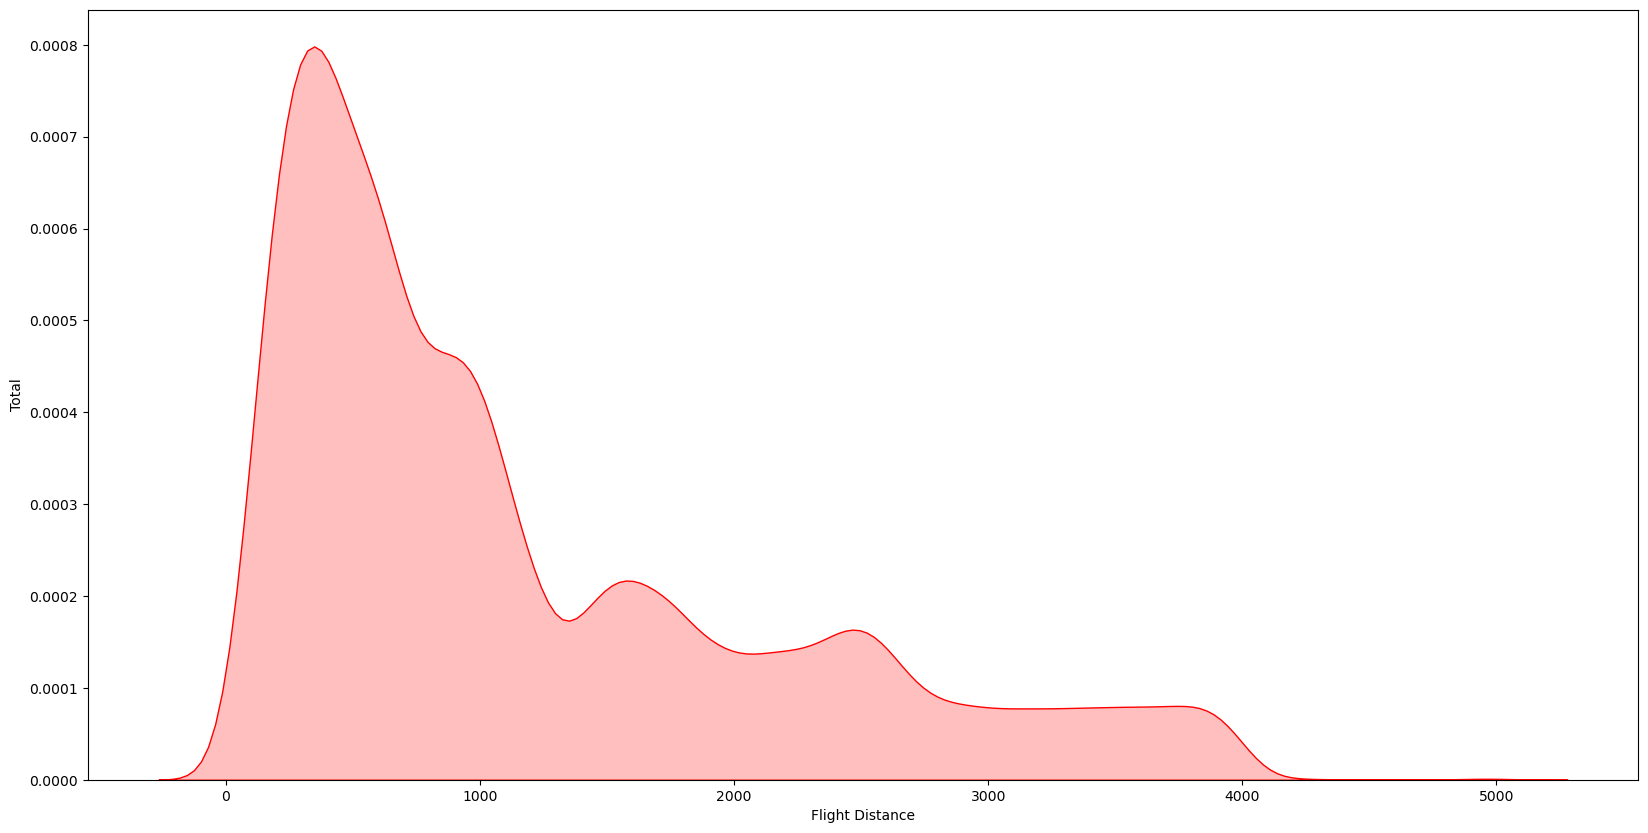

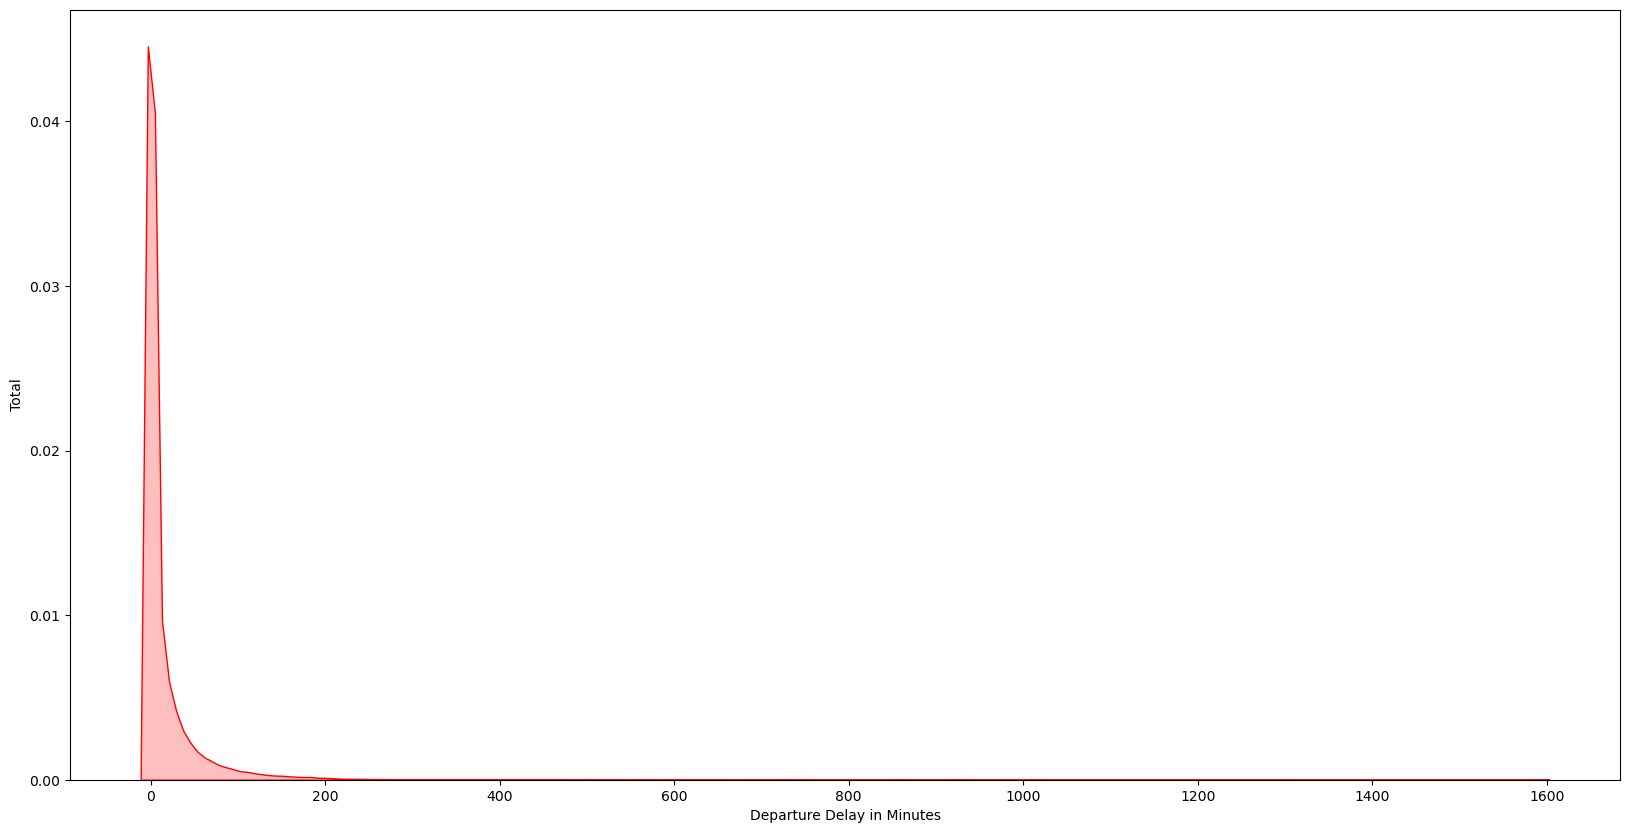

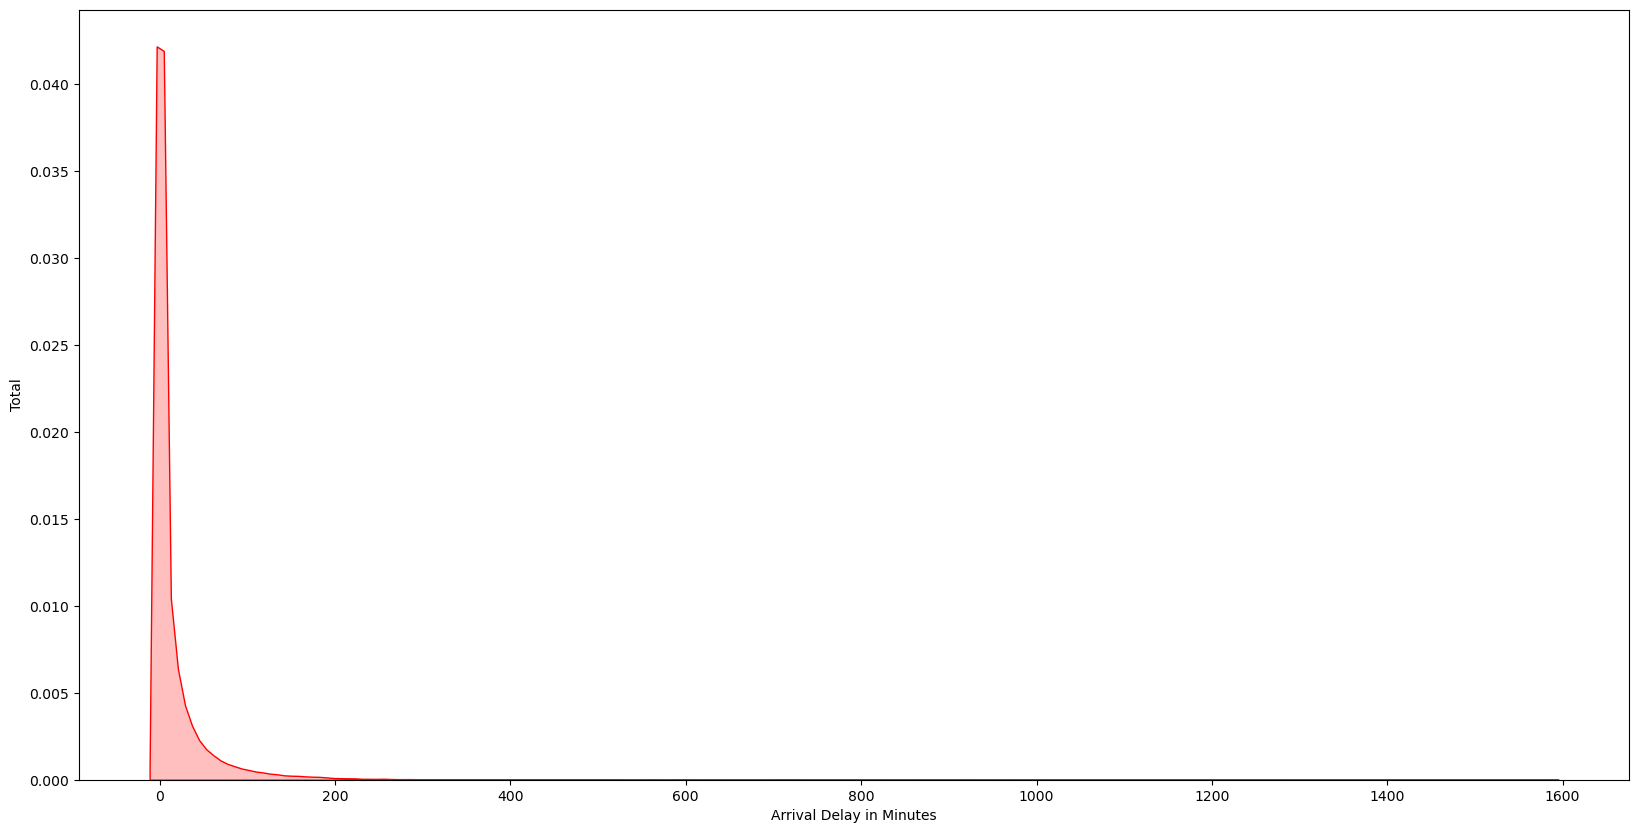

In [95]:
labels2 = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for label in labels2:
    plt.figure(figsize= [20,10])
    sns.kdeplot(dataset[label], color = 'red', fill = True)
    plt.xlabel(label)
    _ = plt.ylabel('Total')
    _ = plt.show()

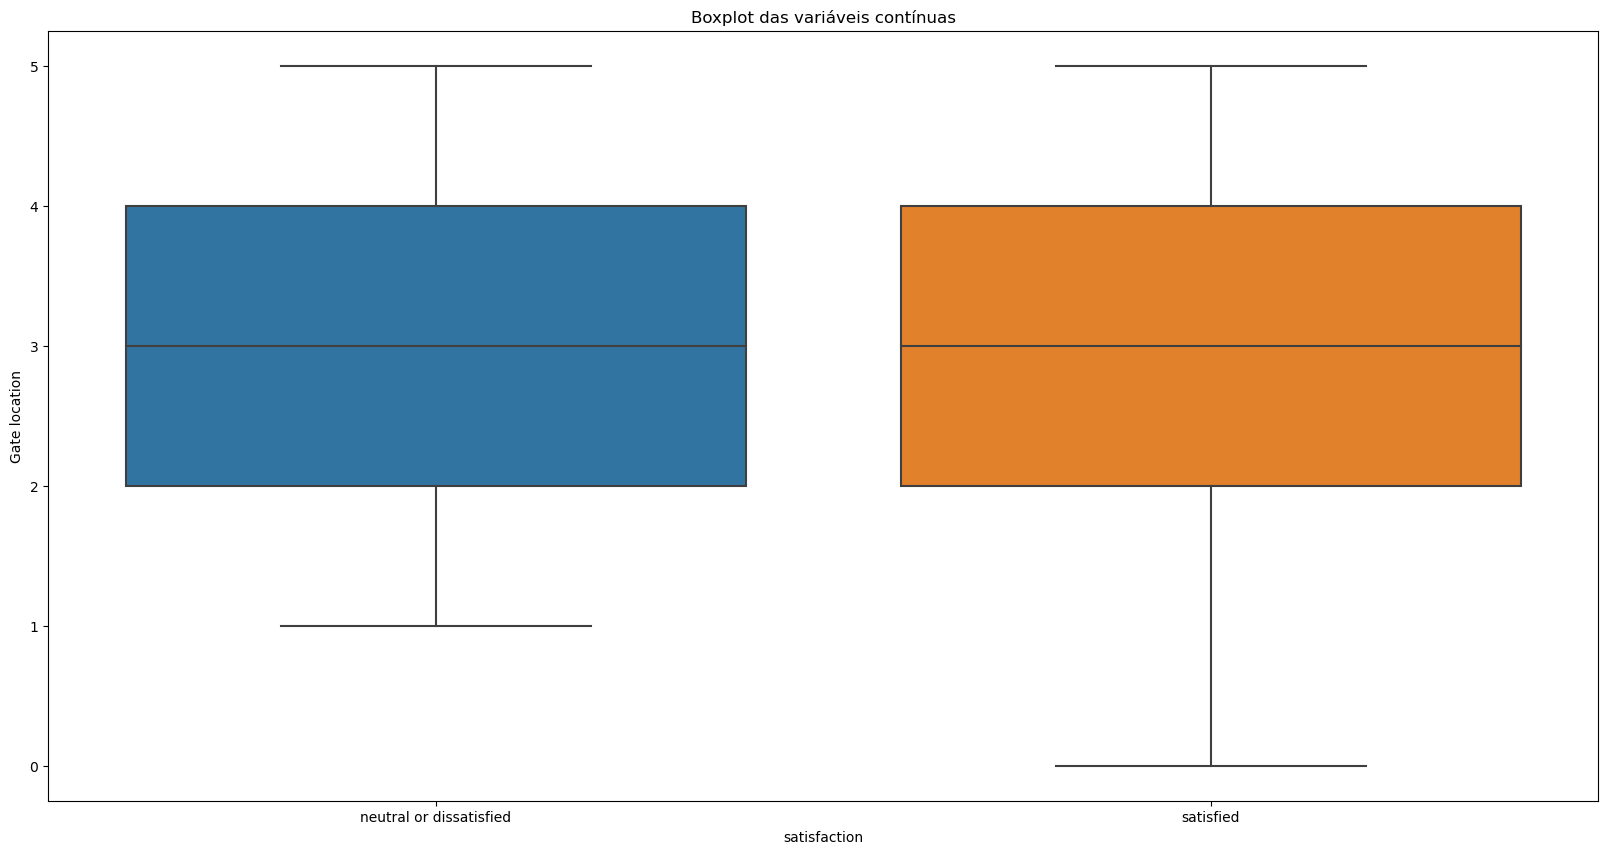

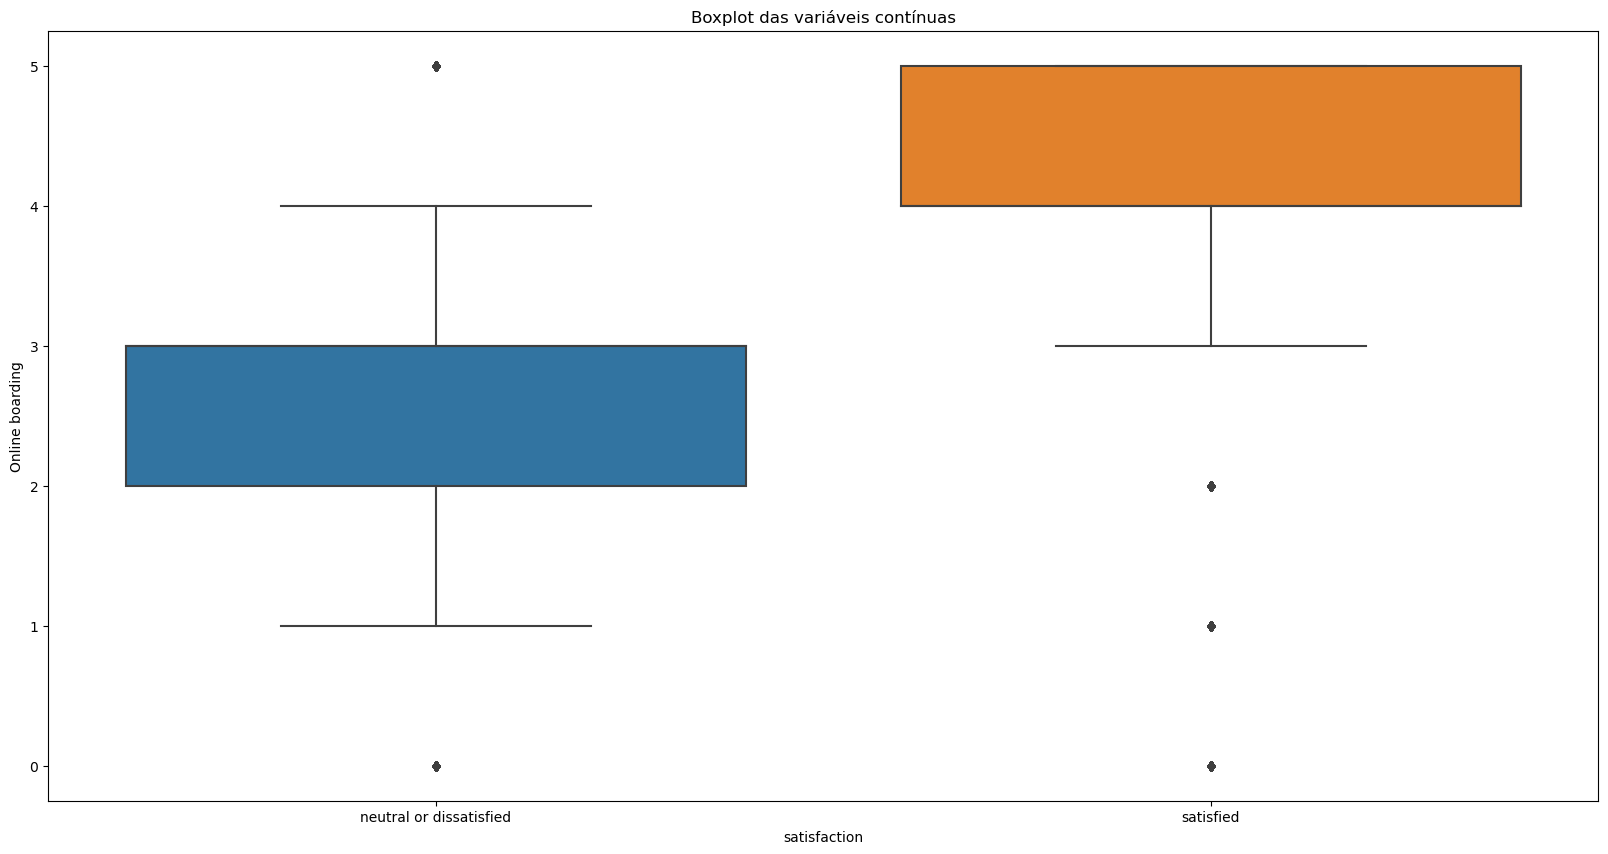

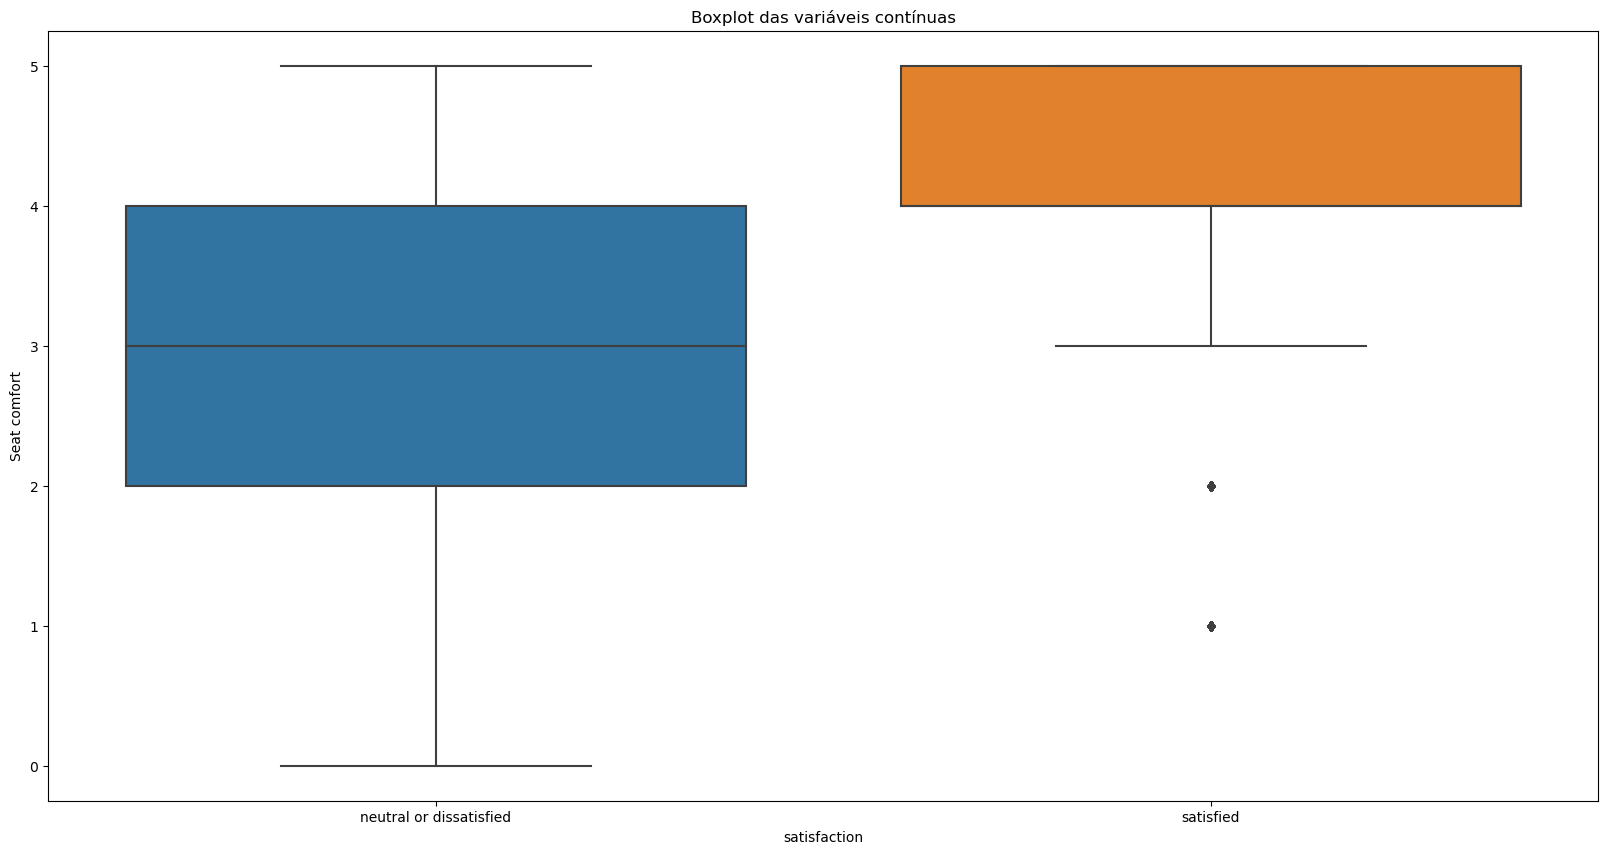

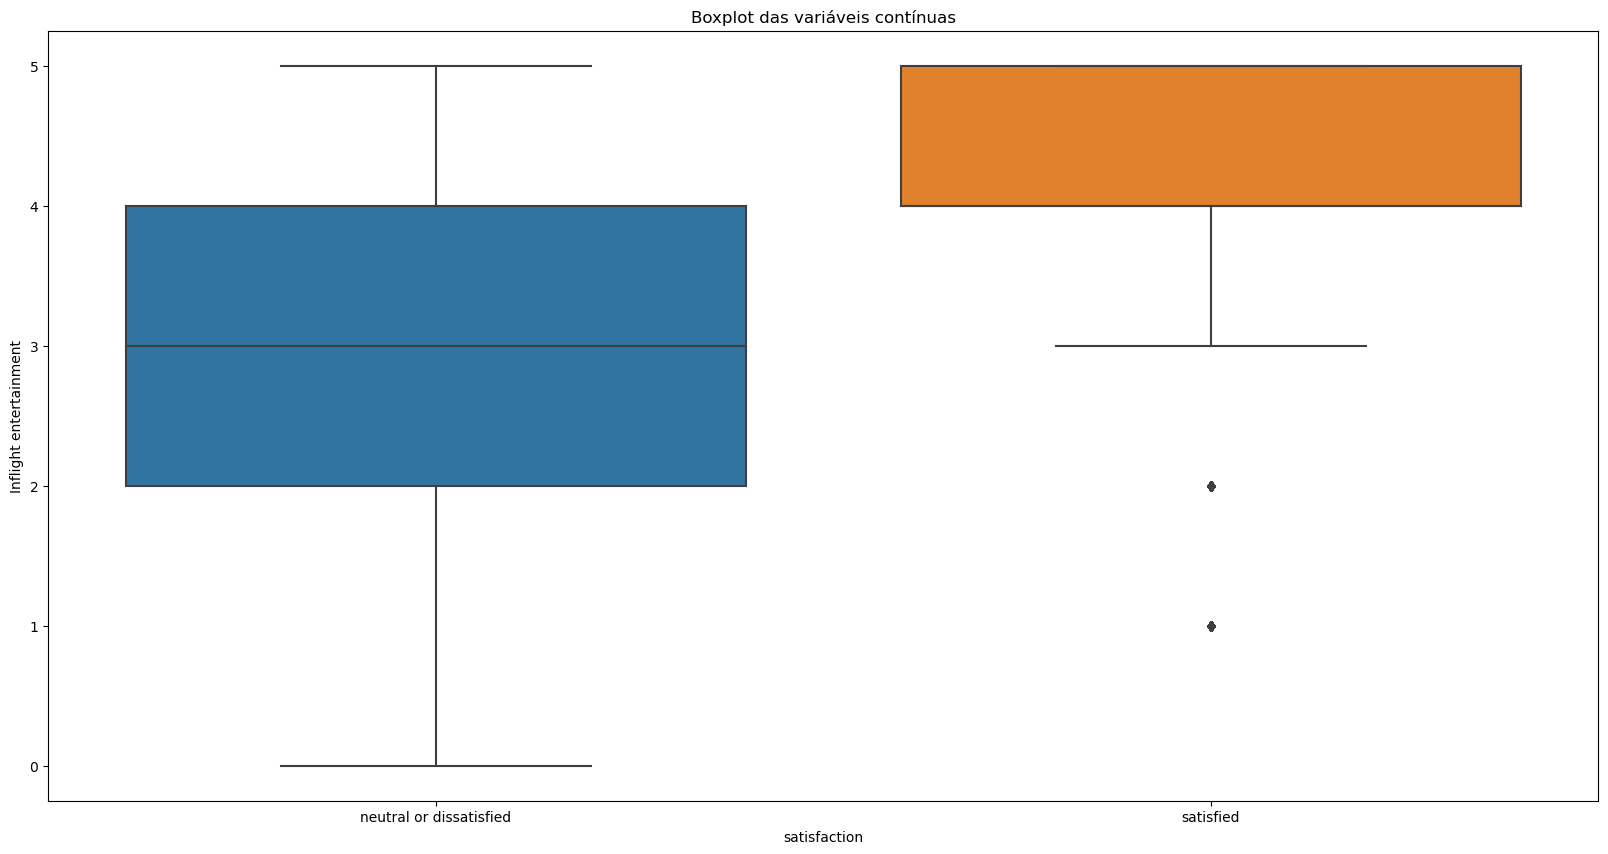

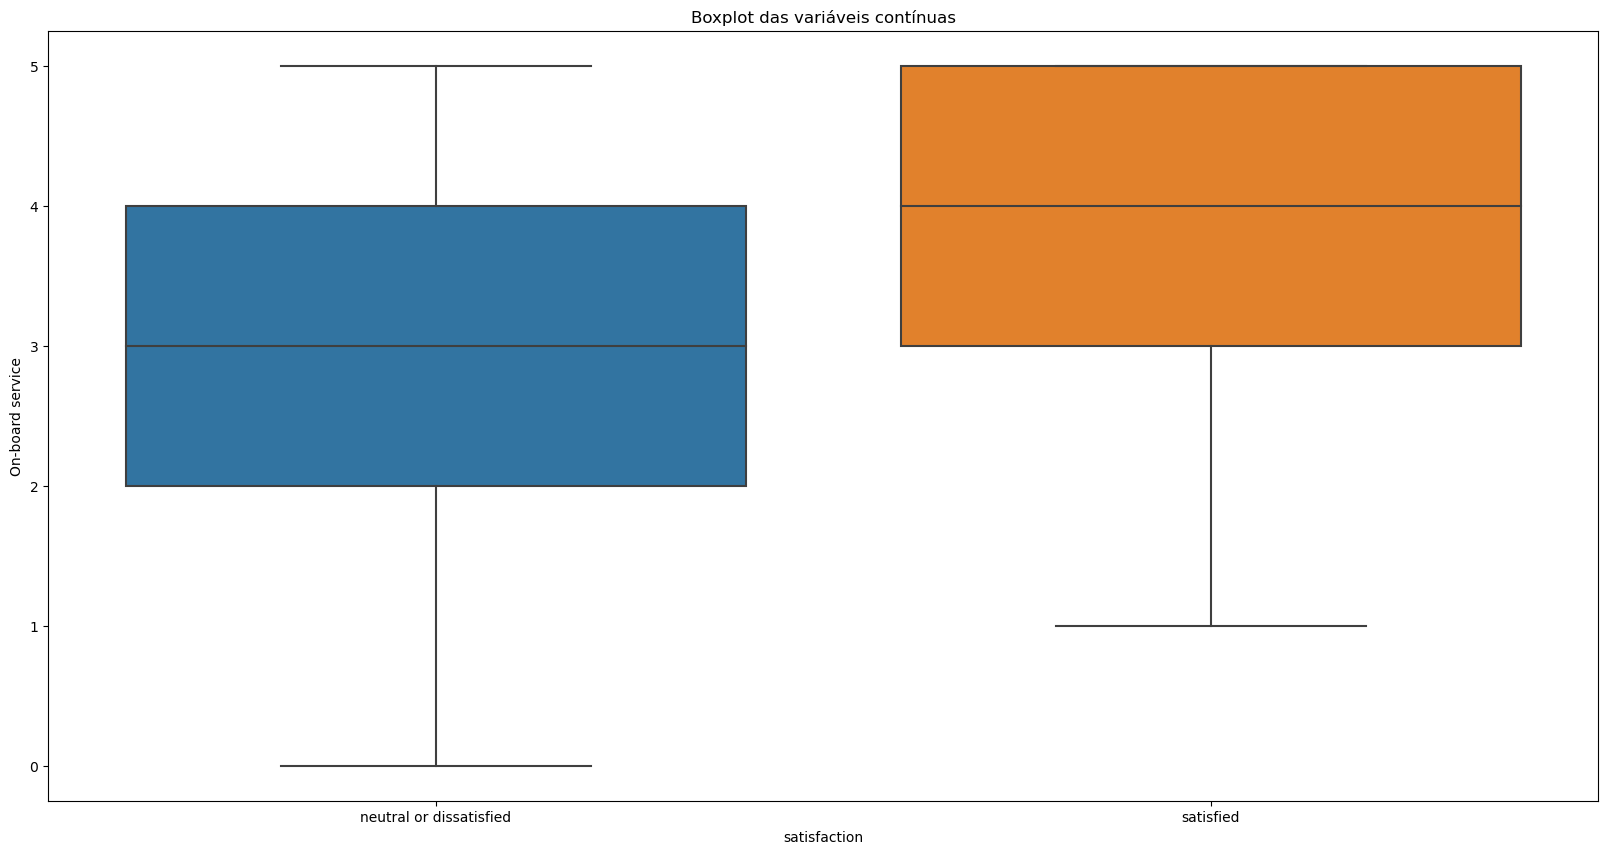

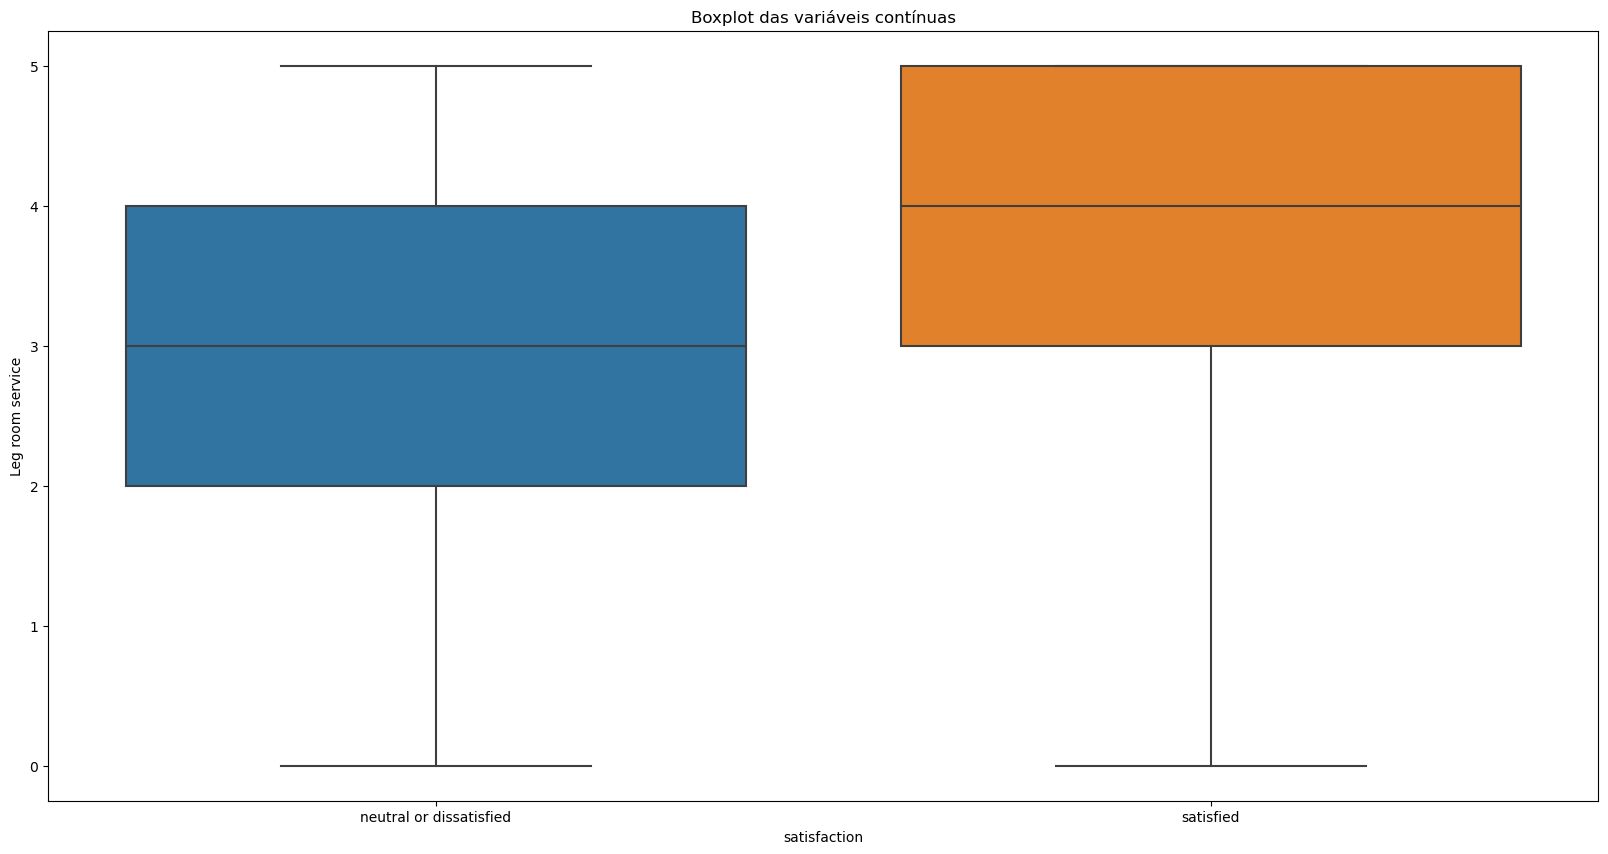

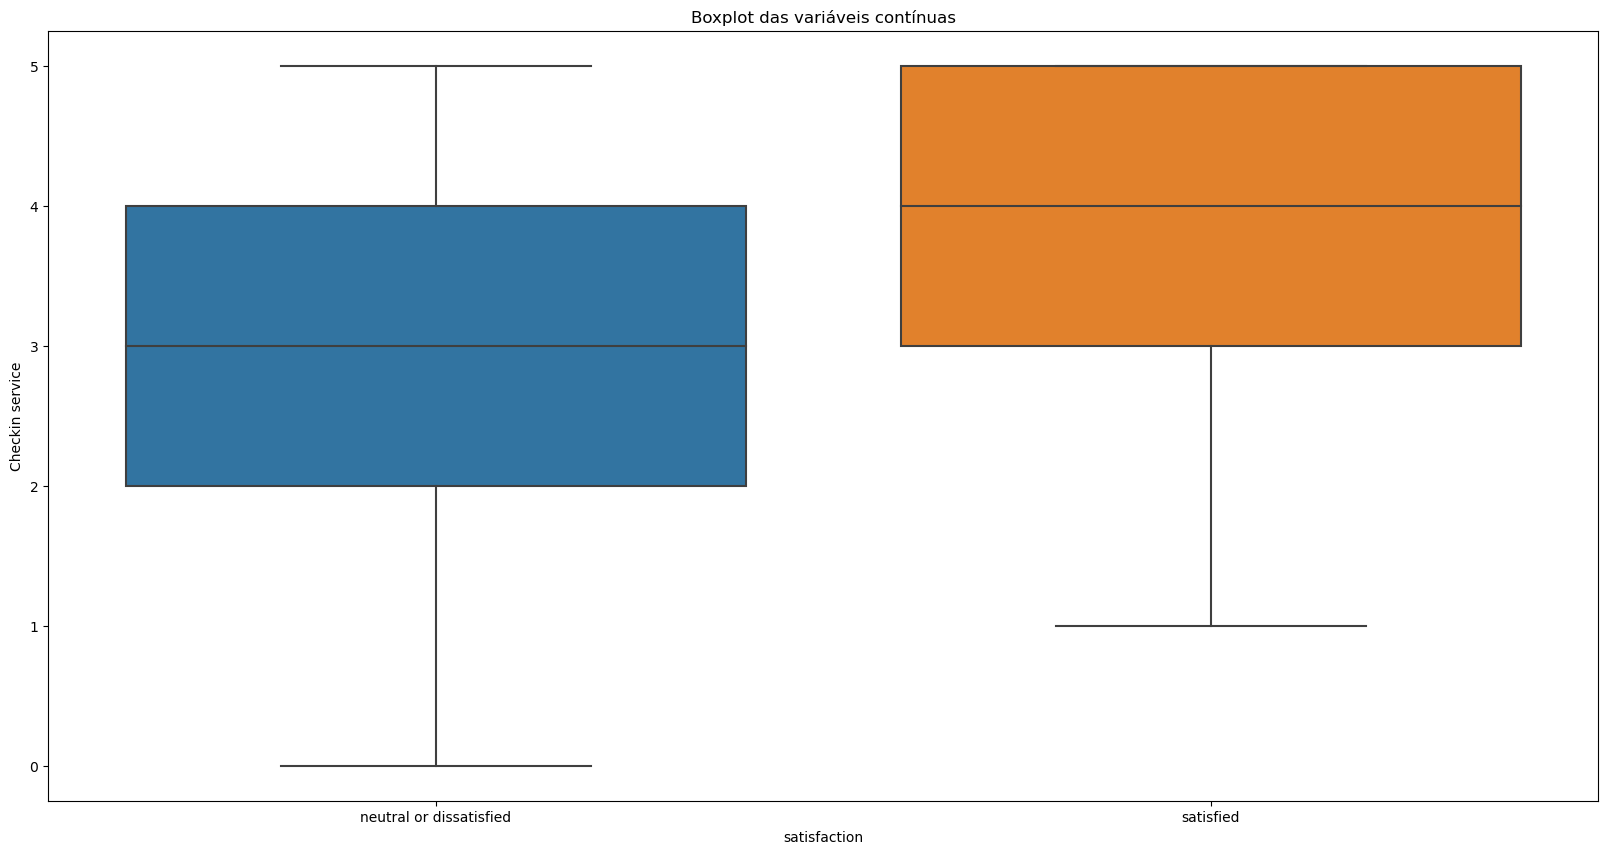

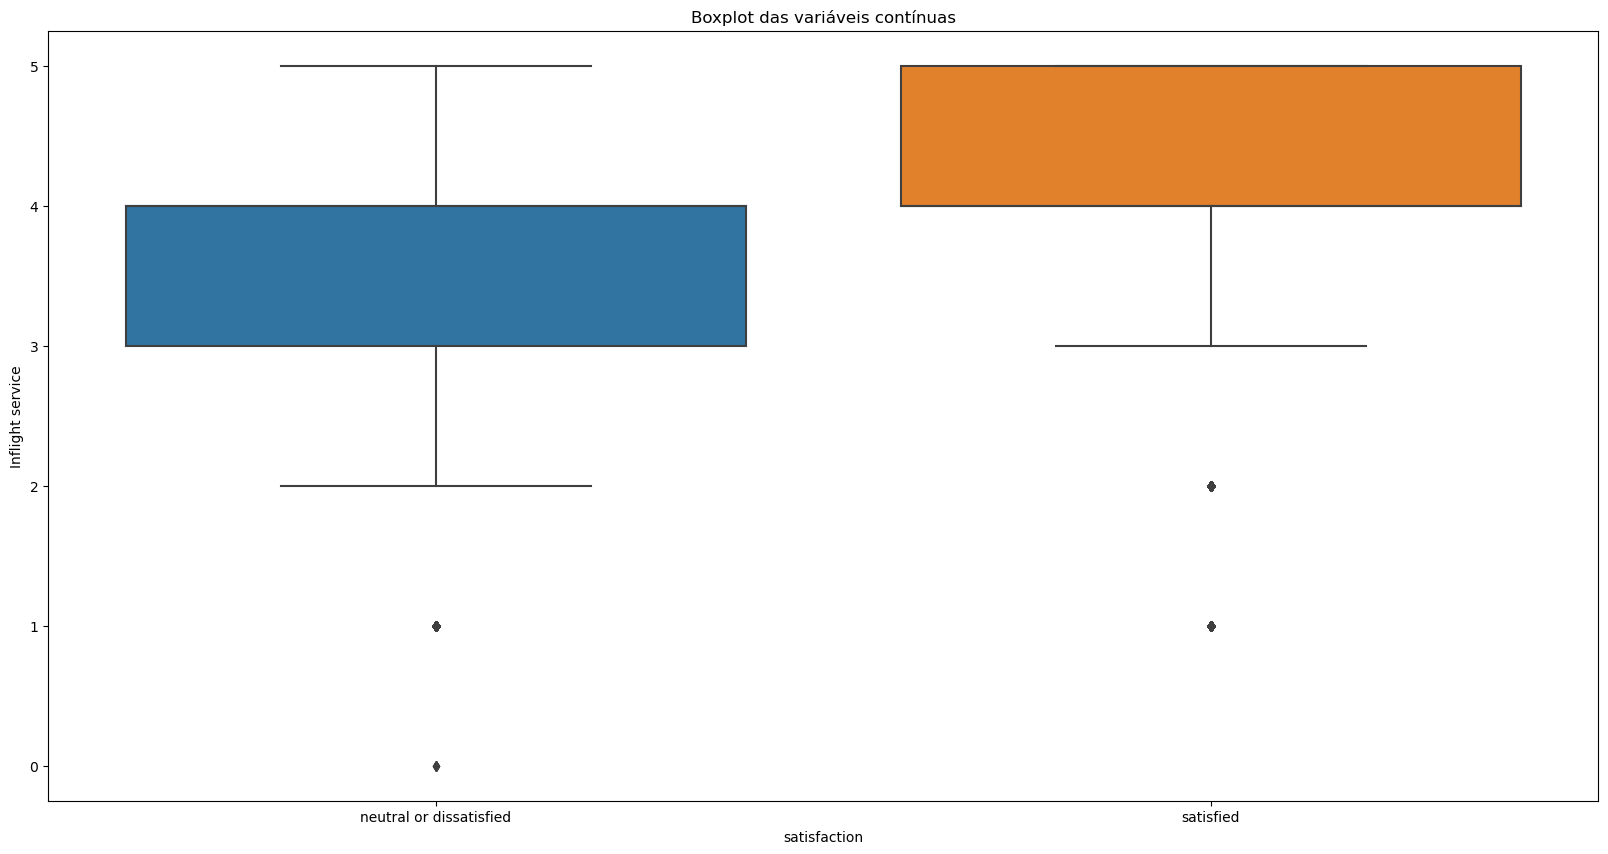

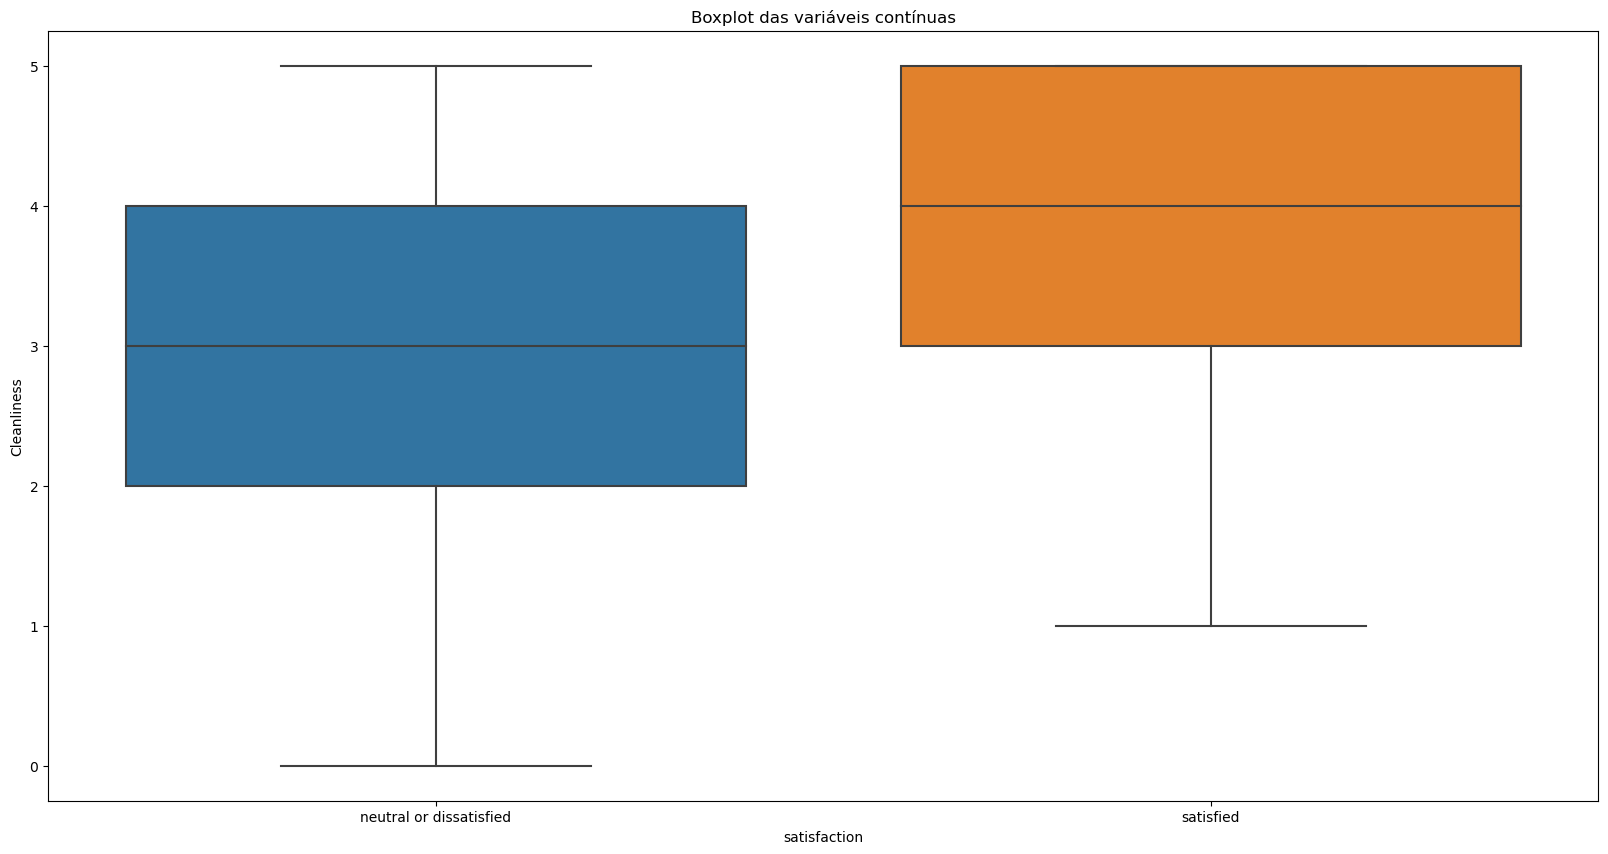

In [96]:
labels_outliers = ['Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service',  'Inflight service', 'Cleanliness']
for label in labels_outliers:
    plt.figure(figsize= [20,10])
    plt.title('Boxplot das variáveis contínuas')
    sns.boxplot(x=dataset['satisfaction'], y=dataset[label])

<AxesSubplot:title={'center':'Boxplot das variáveis contínuas'}, xlabel='satisfaction', ylabel='Departure Delay in Minutes'>

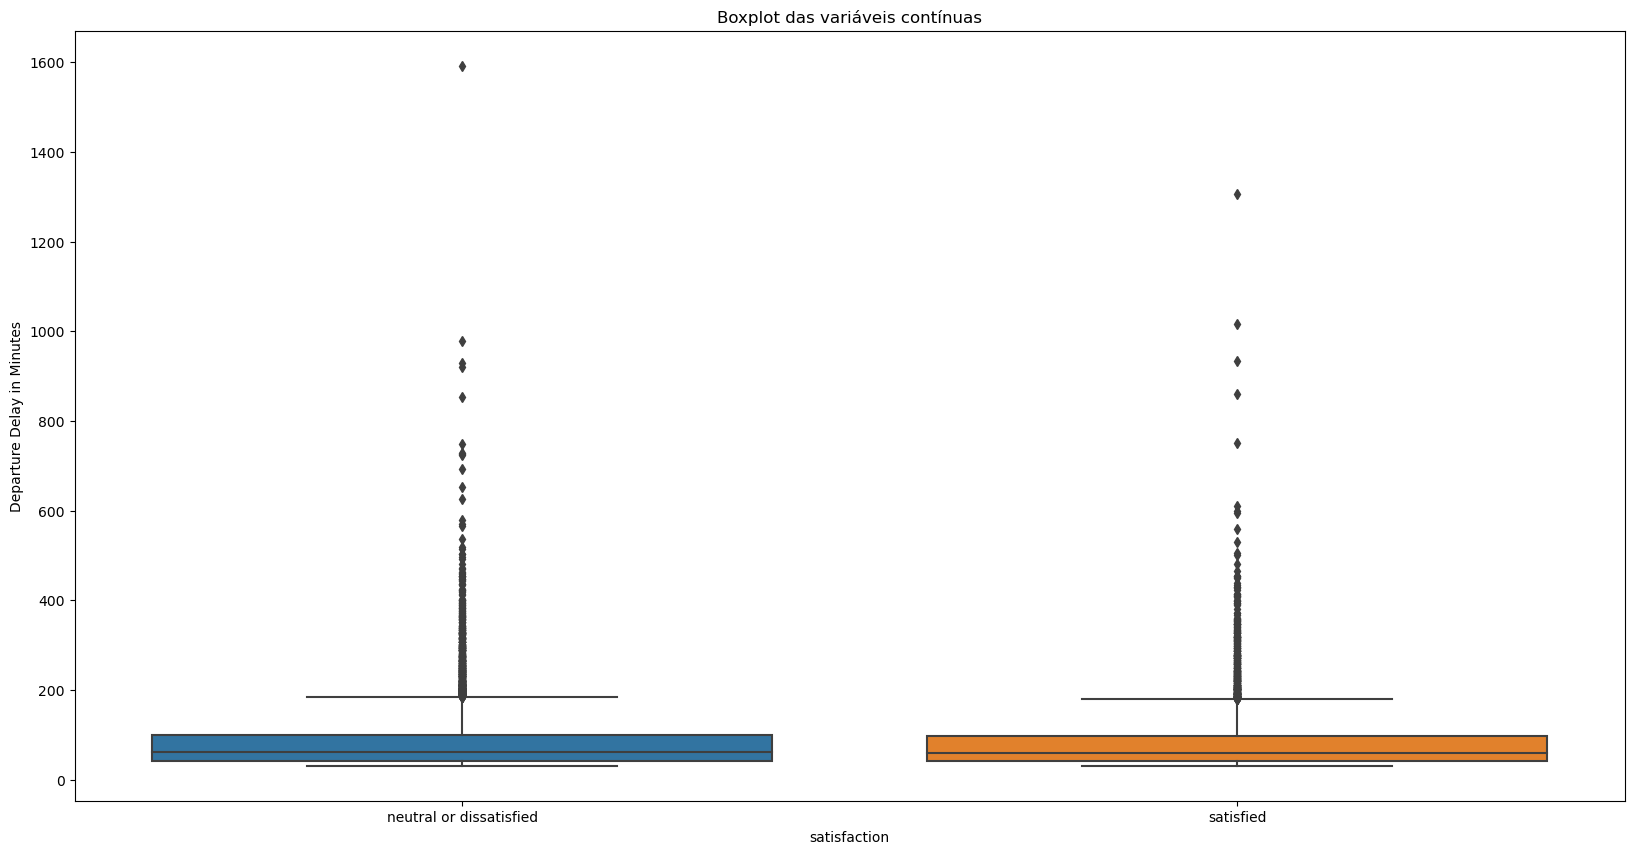

In [97]:
delay1 = dataset[dataset['Departure Delay in Minutes'] > 30]
delay1['Departure Delay in Minutes']
plt.figure(figsize= [20,10])
plt.title('Boxplot das variáveis contínuas')
sns.boxplot(x=dataset['satisfaction'], y=delay1['Departure Delay in Minutes'])

<AxesSubplot:title={'center':'Boxplot das variáveis contínuas'}, xlabel='satisfaction', ylabel='Arrival Delay in Minutes'>

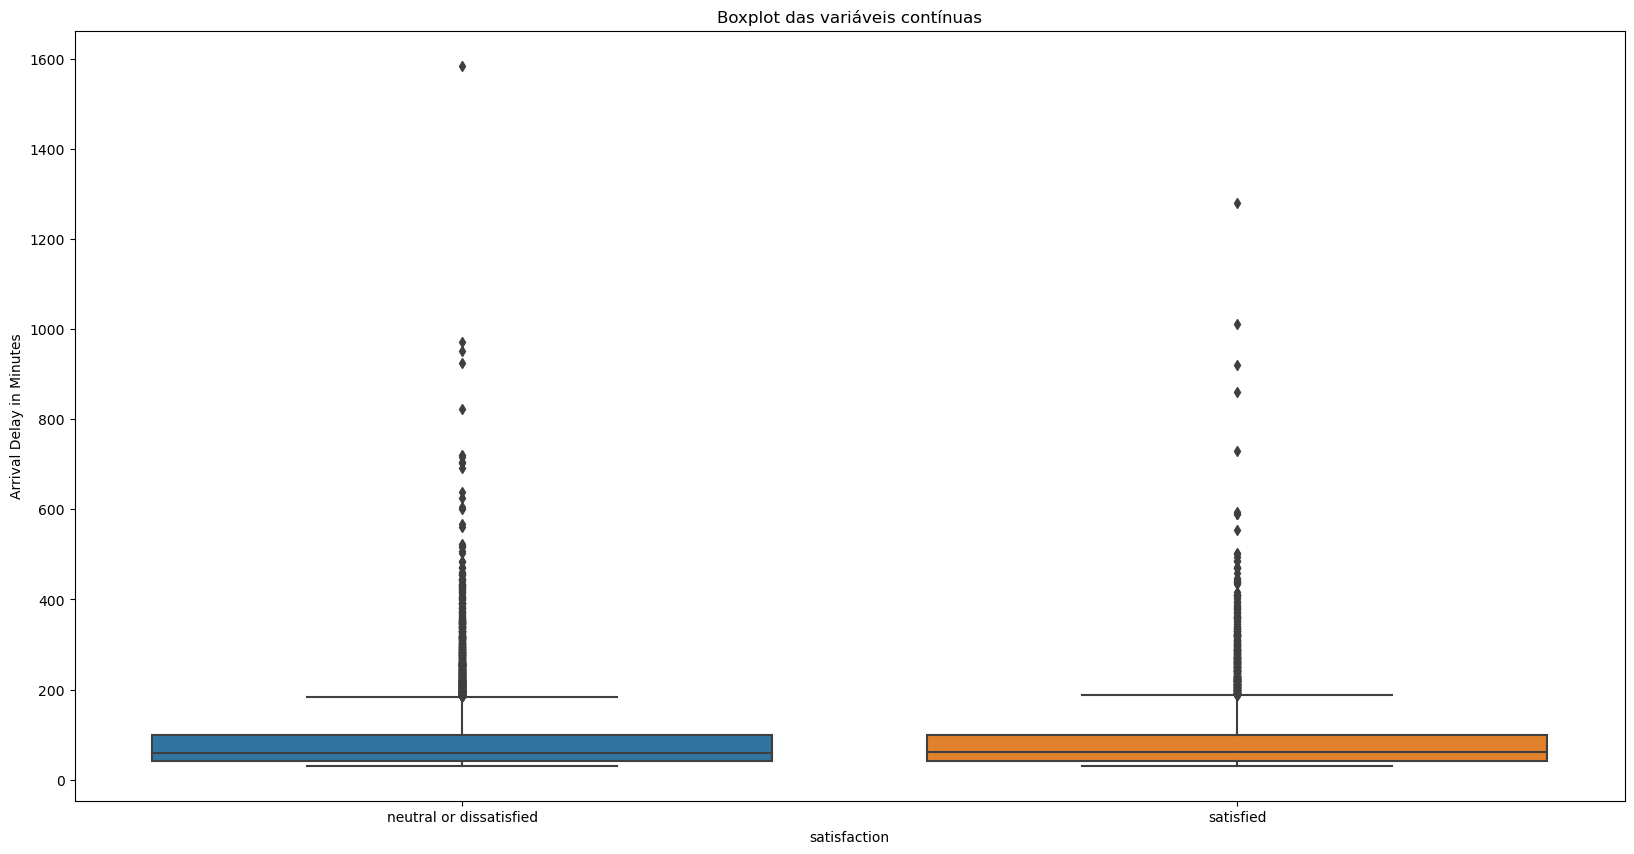

In [98]:
delay1 = dataset[dataset['Arrival Delay in Minutes'] > 30]
delay1['Arrival Delay in Minutes']
plt.figure(figsize= [20,10])
plt.title('Boxplot das variáveis contínuas')
sns.boxplot(x=dataset['satisfaction'], y=delay1['Arrival Delay in Minutes'])

### Outliers

In [100]:
#dataset.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Online boarding

dataset.drop(dataset[(((dataset['Online boarding'] > 4) | (dataset['Online boarding']<1)) & (dataset['satisfaction'] == 'neutral or dissatisfied'))].index, axis=1, inplace=True)

dataset.drop(dataset[dataset['Online boarding'] < 3 
                      & dataset['satisfaction'] == 'satisfied'], 
             axis=1, inplace=True)

# Seat comfort
dataset.drop(dataset[dataset['Seat comfort'] < 3 
                      & dataset['satisfaction'] == 'satisfied'], 
             axis=1, inplace=True)

# Inflight entertainment
dataset.drop(dataset[dataset['Inflight entertainment'] < 3 
                      & dataset['satisfaction'] == 'satisfied'], 
             axis=1, inplace=True)

# Inflight service
dataset.drop(dataset[dataset['Inflight service'] < 2
                      & dataset['satisfaction'] == 'neutral or dissatisfied'], 
             axis=1, inplace=True)

dataset.drop(dataset[dataset['Inflight service'] < 3
                      & dataset['satisfaction'] == 'satisfied'], 
             axis=1, inplace=True)

KeyError: 'Online boarding'

### Pré-Processamento

In [ ]:
# dropando colunas nao usada id e unnamed
dataset.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<AxesSubplot:>

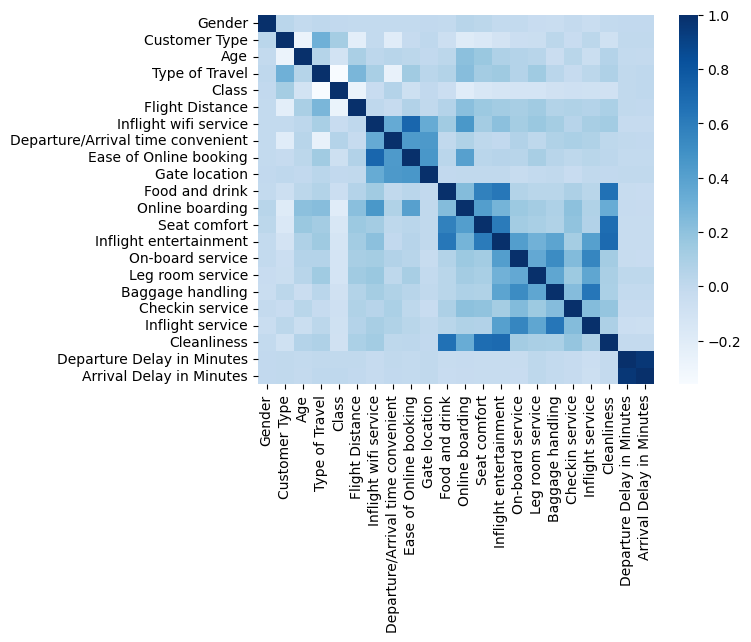

In [ ]:
corr_mat = dataset.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

In [ ]:
for idx, type in enumerate(dataset['Customer Type'].unique()):
  dataset['Customer Type'] = dataset['Customer Type'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Customer Type')

dataset.head()

Loyal Customer foi trocado por 0 em Customer Type
disloyal Customer foi trocado por 1 em Customer Type


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,0,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,1,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,0,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,0,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,0,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
for idx, type in enumerate(dataset['Type of Travel'].unique()):
  dataset['Type of Travel'] = dataset['Type of Travel'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Customer Type')

dataset.head()

Personal Travel foi trocado por 0 em Customer Type
Business travel foi trocado por 1 em Customer Type


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,0,13,0,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,1,25,1,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,0,26,1,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,0,25,1,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,0,61,1,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
for idx, type in enumerate(dataset['Class'].unique()):
  dataset['Class'] = dataset['Class'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Customer Type')

dataset.head()

Eco Plus foi trocado por 0 em Customer Type
Business foi trocado por 1 em Customer Type
Eco foi trocado por 2 em Customer Type


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
for idx, type in enumerate(dataset['Gender'].unique()):
  dataset['Gender'] = dataset['Gender'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Customer Type')

dataset.head()

Male foi trocado por 0 em Customer Type
Female foi trocado por 1 em Customer Type


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
